In [1]:
import ROOT
from array import array
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.26/08


In [2]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:d} ({:.1f}%)".format(absolute, pct)

In [21]:
def percentuali(tree, clust, branchname, hist_first, hist_last, gender, colors, labels):
    hist_first.Reset("ICES")
    hist_last.Reset("ICES")
    pct_bins = 200
    pct_var = ROOT.TH1F("pct_var_" + branchname + "_clst" + str(clust) + "_gend" + str(gender), ";Variazione percentuale " + branchname + ";", pct_bins, -40, 40)
    pct_var_vis = ROOT.TH2F("pct_var_" + branchname + "_clst" + str(clust) + "_gend" + str(gender) + "_vs_visite", ";Variazione percentuale " + branchname + ";Visite", pct_bins, -20, 20, 20, 1.5, 20.5)
    pre_id = -9999
    first_values = []
    last_values = []
    print(first_values)
    for entry in tree:
        if entry.Gender != gender:
            continue
        if entry.Local_ID == 42:
            continue
        id = entry.Local_ID
        if pre_id == -9999:
            cluster = entry.cluster
            pre_id = id
            first_value = getattr(entry, branchname)
        if pre_id != -9999 and pre_id != id and last_value > 0:
            if(cluster == clust or (clust < 0) or (clust == 0 and cluster != 10)):
                hist_first.Fill(first_value)
                hist_last.Fill(last_value)
                first_values.append(first_value)
                last_values.append(last_value)
                pct_var.Fill(100*(last_value-first_value)/first_value)
                pct_var_vis.Fill(100*(last_value-first_value)/first_value, nr_visite+1)
        if(pre_id == id):
            last_value = getattr(entry, branchname)
            nr_visite = entry.nr_visite
        else:
            last_value = -1
        if pre_id != id:
            cluster = entry.cluster
            pre_id = id
            first_value = getattr(entry, branchname)

        #print(id, first_value, last_value, hist_first.GetEntries(), hist_last.GetEntries())
    data_f = [hist_first.GetBinContent(i+1) for i in  range(hist_first.GetNbinsX())]
    data_l = [hist_last.GetBinContent(i+1) for i in  range(hist_last.GetNbinsX())]
    print(sum(data_f))
    print(sum(data_l))
    print(hist_first.GetMean())
    print(hist_last.GetMean())
    # plot first
    fig = plt.figure(figsize = (14,12))
    ax = fig.add_subplot(2, 2, 1)
    wedges, texts, autotexts = ax.pie(data_f, autopct=lambda pct: func(pct, data_f), textprops=dict(color="black"), colors=colors, radius=1.5) #, frame=True
    #ax.legend(wedges, labels, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize = 'xx-large')
    plt.setp(autotexts, size=15, weight="bold")
    #fig.savefig(branchname + '_first_' + str(clust) + '.png')
    # plot last
    #fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(2, 2, 2)
    wedges, texts, autotexts = ax.pie(data_l, autopct=lambda pct: func(pct, data_l), textprops=dict(color="black"), colors=colors, radius=1.5) #, frame=True
    ax.legend(wedges, labels, title="", loc="center left", bbox_to_anchor=(1.25, 0, 1, 1), fontsize = 'xx-large')
    plt.setp(autotexts, size=15, weight="bold")
    #plt.setp(autotexts, size=15)
    #fig.savefig(branchname + '_last_' + str(clust) + '.png')
    plt.show()
    c1 = ROOT.TCanvas()
    c1.Divide(1,2)
    c1.cd(1)
    if(hist_first.GetEntries()>0):
        hist_first.Scale(1/hist_first.GetEntries())
    hist_first.Draw()
    c1.cd(2)
    if(hist_last.GetEntries()>0):
        hist_last.Scale(1/hist_last.GetEntries())
    hist_last.Draw()
    c1.Draw()
    c1.Print("BMI" + str(clust) + ".png")
    c2 = ROOT.TCanvas()
    c2.cd()
    pct_var.Draw()
    print("var neg " + str(pct_var.Integral(1, int(pct_bins/2))) + " var pos " + str(pct_var.Integral(int(pct_bins/2), pct_bins)))
    data_var = [sum([pct_var.GetBinContent(i) for i in  range(0, int(pct_bins/2)+1)]), sum([pct_var.GetBinContent(i) for i in  range(int(pct_bins/2)+1, pct_bins+2)])]
    print(sum(data_var))
    # plot var
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot()
    wedges, texts, autotexts = ax.pie(data_var, autopct=lambda pct: func(pct, data_var), textprops=dict(color="black"), colors=["green", "red"], radius=1) #, frame=True
    ax.legend(wedges, ["Variazione negativa", "Variazione positiva"], title="", loc="center left", bbox_to_anchor=(1, 0, 1, 1), fontsize = 'xx-large')
    plt.setp(autotexts, size=15, weight="bold")
    #plt.setp(autotexts, size=15)
    #fig.savefig(branchname + '_last_' + str(clust) + '.png')
    plt.show()
    print("var mean " + str(pct_var.GetMean()) + " var rms " + str(pct_var.GetRMS()))
    c2.Print("pct_var_" + branchname + "_clst" + str(clust) + "_gend" + str(gender) + ".png")
    c3 = ROOT.TCanvas()
    c3.cd()
    pct_var_vis.Draw("COLZ")
    c3.Print("pct_var_" + branchname + "_clst" + str(clust) + "_gend" + str(gender) + "_vs_visite.png")
    c4 = ROOT.TCanvas()
    c4.cd()
    pct_var_vis.ProfileY().Draw()
    c4.Print("pct_var_" + branchname + "_clst" + str(clust) + "_gend" + str(gender) + "_vs_visite_profile.png")
    

In [4]:
infile = ROOT.TFile.Open("InBodyExcelData_2022-09-08_18-03-19_ridotto_ML_new.root")
tree = infile.Get("t1")

In [5]:
uomo = 0
donna = 1

In [6]:
branch = "BMI"
xarray = array('f', [10, 18.5, 24.9, 29.9, 34.9, 39.9, 70])
bmi_first = ROOT.TH1F("bmi_first", ";BMI;", len(xarray)-1, xarray)
bmi_last = ROOT.TH1F("bmi_last", ";BMI;", len(xarray)-1, xarray)
colors = ['yellow', 'green', 'orange', 'red', 'darkred', 'darkmagenta']
#labels = ['Sottopeso', 'Normopeso', 'Sovrappeso', 'Obesità di 1° grado', 'Obesità di 2° grado', 'Obesità morbigena']
labels = ['Underweight', 'Normal weight', 'Overweight', 'Moderately obese', 'Severely obese', 'Very severely obese']

[]
424.0
424.0
30.65070750128548
29.29316034856832


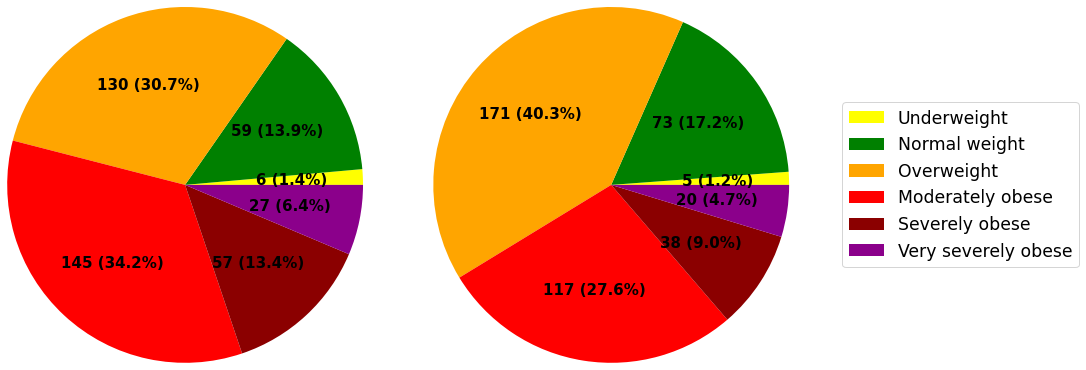

var neg 328.0 var pos 101.0
424.0


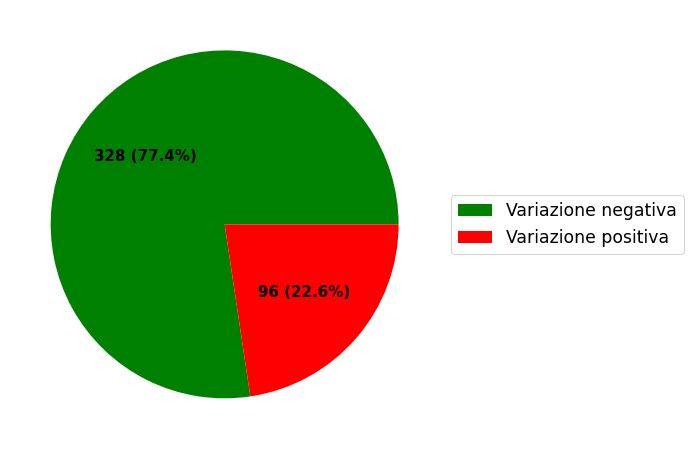

var mean -4.02871697786032 var rms 5.902475940264662


Info in <TCanvas::Print>: png file BMI-1.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst-1_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst-1_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst-1_gend0_vs_visite_profile.png has been created


In [7]:
percentuali(tree, -1, branch, bmi_first, bmi_last, uomo, colors, labels)

[]
1202.0
1202.0
29.07512482866868
27.973044912747653


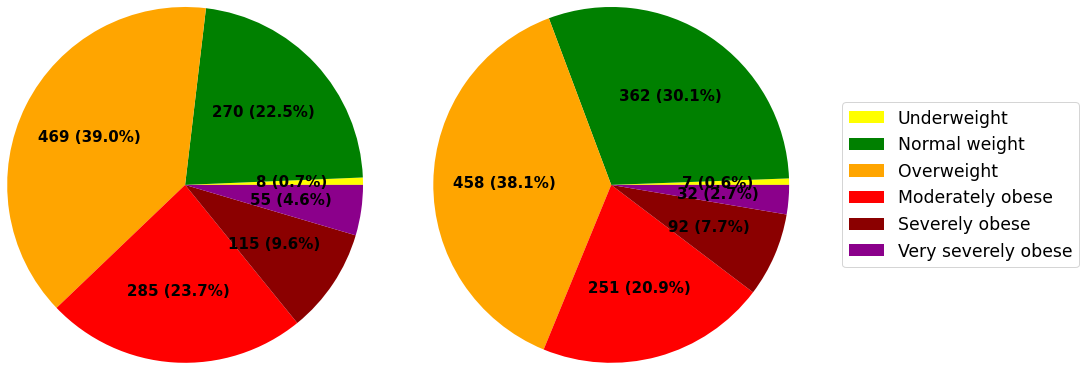

var neg 945.0 var pos 273.0
1202.0


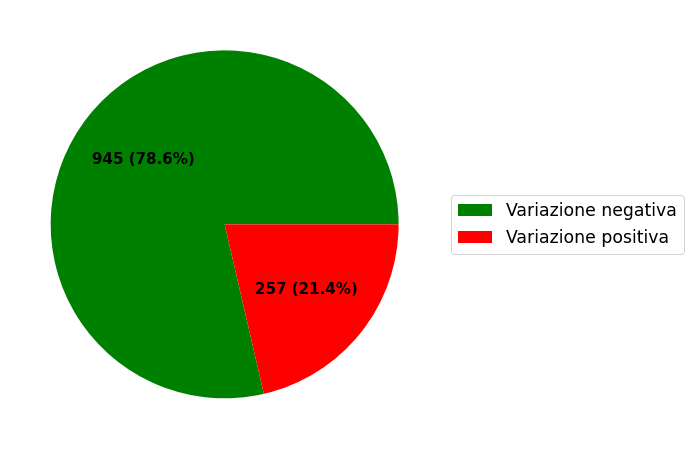

var mean -3.629572220258493 var rms 5.869560474952658


Info in <TCanvas::Print>: png file BMI-1.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst-1_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst-1_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst-1_gend1_vs_visite_profile.png has been created


In [8]:
percentuali(tree, -1, branch, bmi_first, bmi_last, donna, colors, labels)

In [ ]:
for cluster in range(11):
    percentuali(tree, cluster, branch, bmi_first, bmi_last, uomo, colors, labels)

In [9]:
branch = "BMI"
xarray = array('f', [10, 18.5, 24.9, 29.9, 34.9, 39.9, 70])
bmi_first = ROOT.TH1F("bmi_first", ";BMI;", len(xarray)-1, xarray)
bmi_last = ROOT.TH1F("bmi_last", ";BMI;", len(xarray)-1, xarray)
colors = ['yellow', 'green', 'orange', 'red', 'darkred', 'darkmagenta']
labels = ['Sottopeso', 'Normopeso', 'Sovrappeso', 'Obesità di 1° grado', 'Obesità di 2° grado', 'Obesità morbigena']

Warning in <TFile::Append>: Replacing existing TH1: bmi_first (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: bmi_last (Potential memory leak).


[]
1180.0
1180.0
29.261610204082423
28.13177964808577


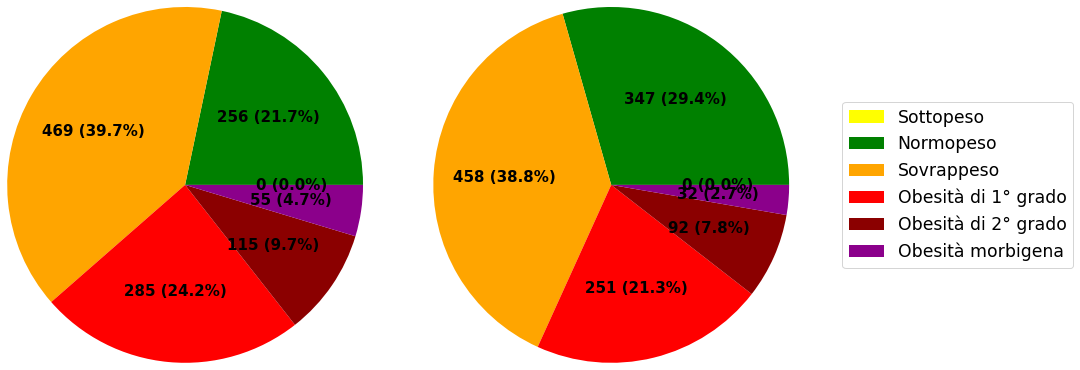

var neg 938.0 var pos 258.0
1196.0


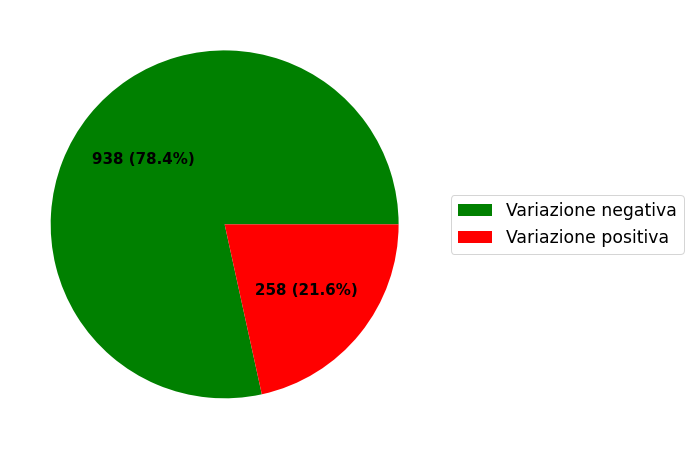

var mean -3.7388985718527357 var rms 5.8423445350946865
[]
0.0
0.0
0.0
0.0


/tmp/ipykernel_989/690528617.py:49: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_f, autopct=lambda pct: func(pct, data_f), textprops=dict(color="black"), colors=colors, radius=1.5) #, frame=True
/tmp/ipykernel_989/690528617.py:56: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_l, autopct=lambda pct: func(pct, data_l), textprops=dict(color="black"), colors=colors, radius=1.5) #, frame=True


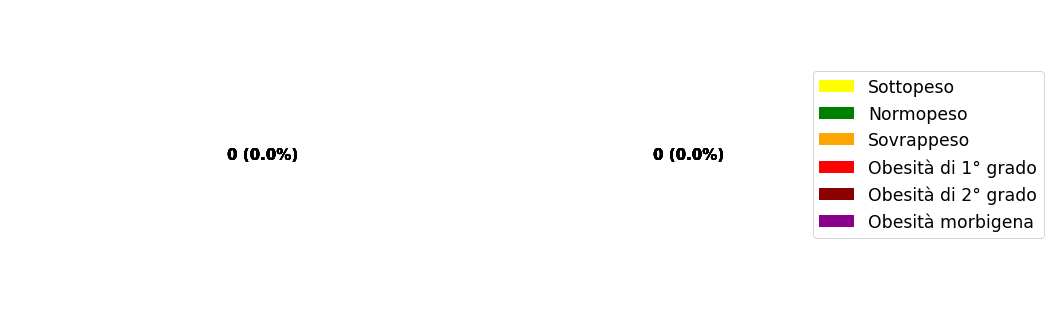

/tmp/ipykernel_989/690528617.py:82: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_var, autopct=lambda pct: func(pct, data_var), textprops=dict(color="black"), colors=["green", "red"], radius=1) #, frame=True


var neg 0.0 var pos 0.0
0.0


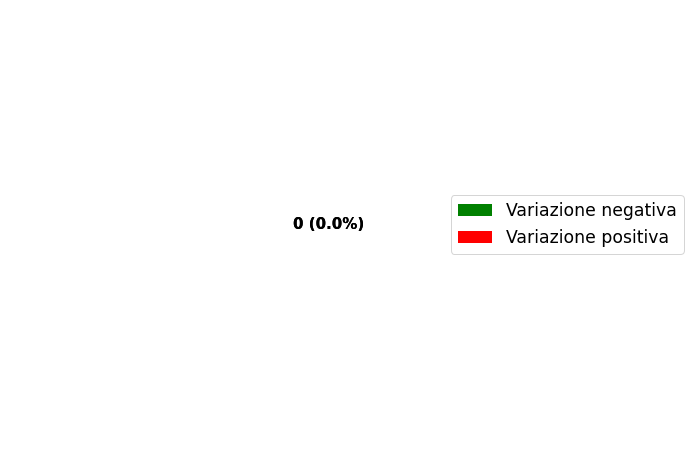

var mean 0.0 var rms 0.0
[]
121.0
121.0
38.90000012295305
36.708264500641626


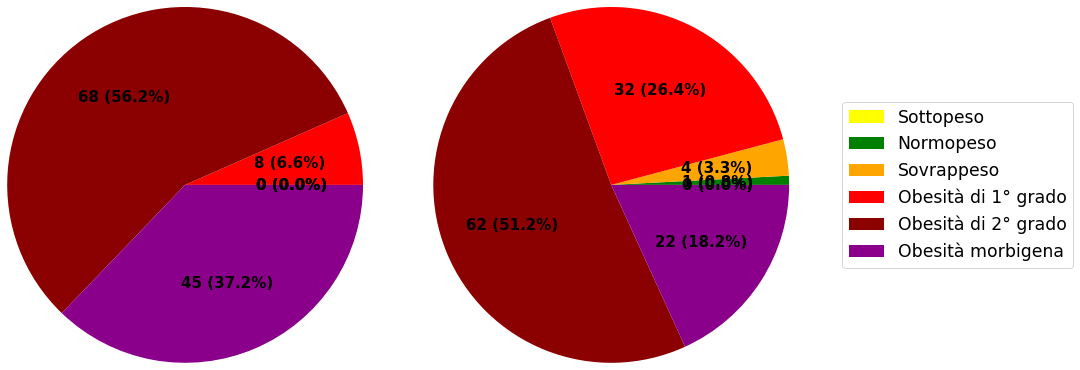

var neg 105.0 var pos 19.0
124.0


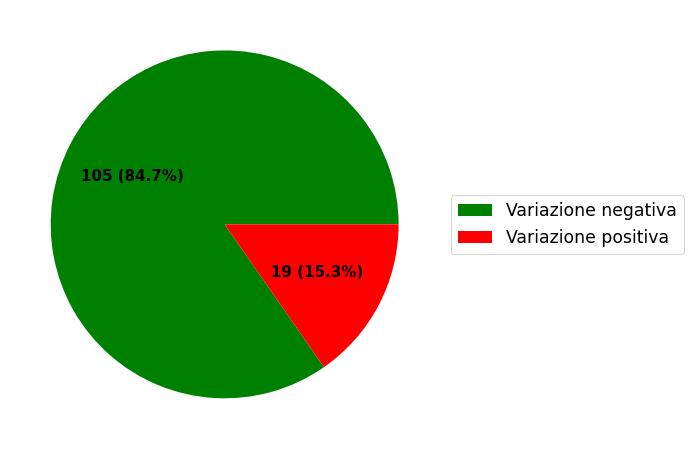

var mean -5.638685085580441 var rms 6.7028497197583246
[]
222.0
222.0
30.64639649090466
29.18603604119103


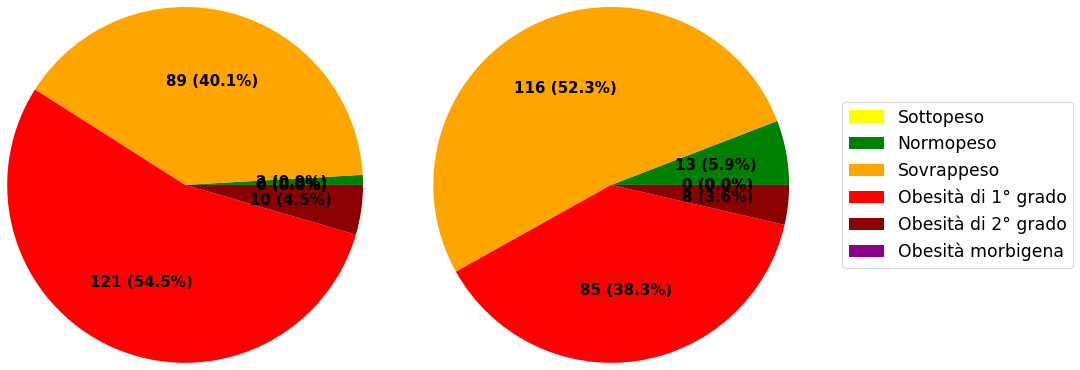

var neg 188.0 var pos 39.0
227.0


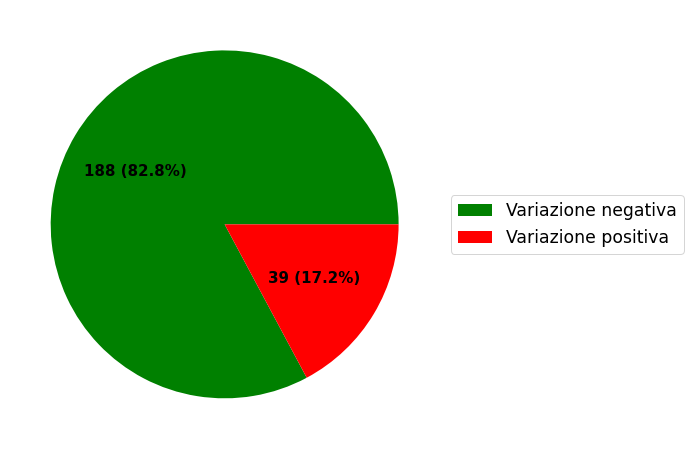

var mean -4.7813916026087835 var rms 5.316784592309059
[]
10.0
10.0
49.00999984741211
45.709999084472656


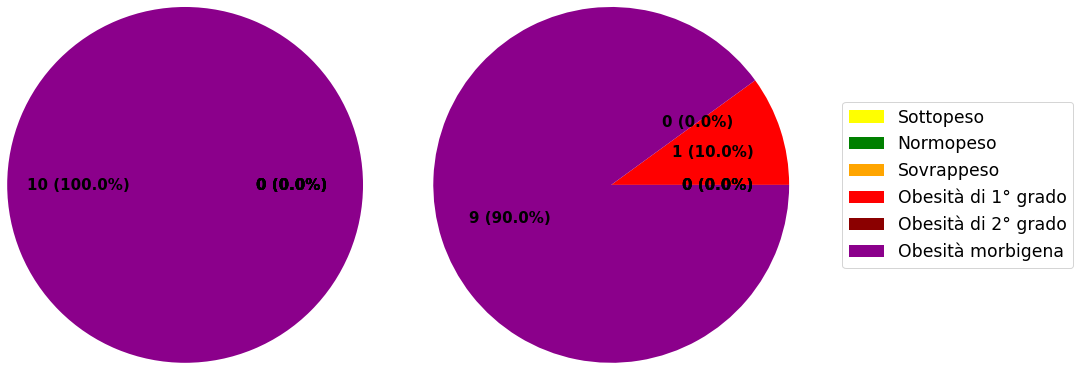

var neg 9.0 var pos 1.0
10.0


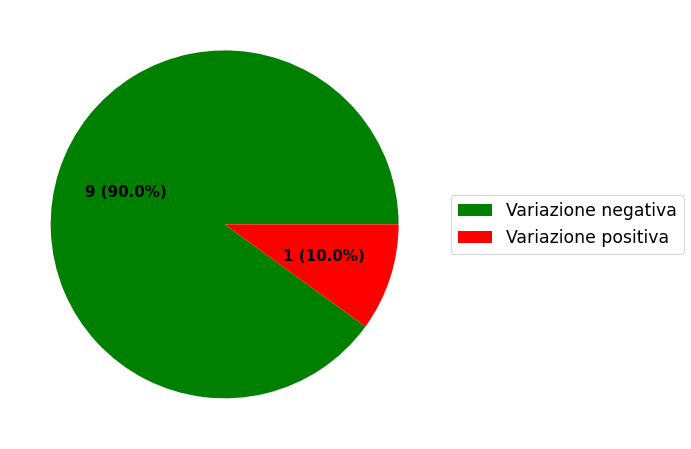

var mean -6.770781774279856 var rms 6.860523348959947
[]
62.0
62.0
29.988709849696004
28.606451588292277


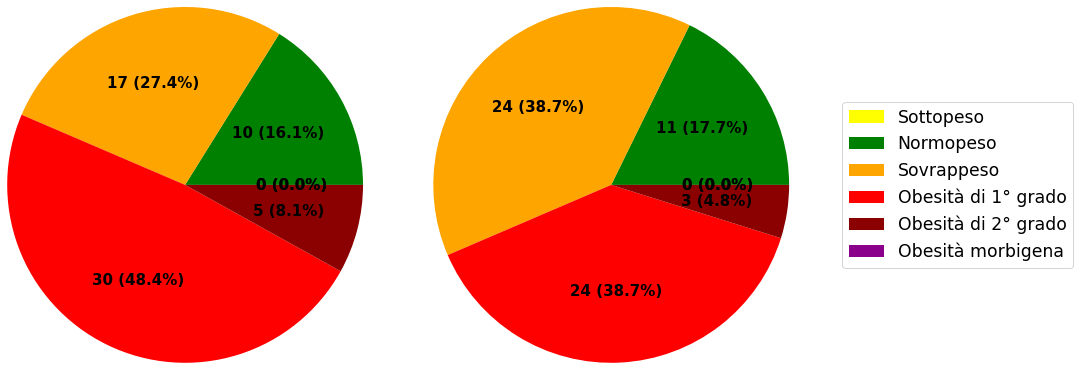

var neg 56.0 var pos 6.0
62.0


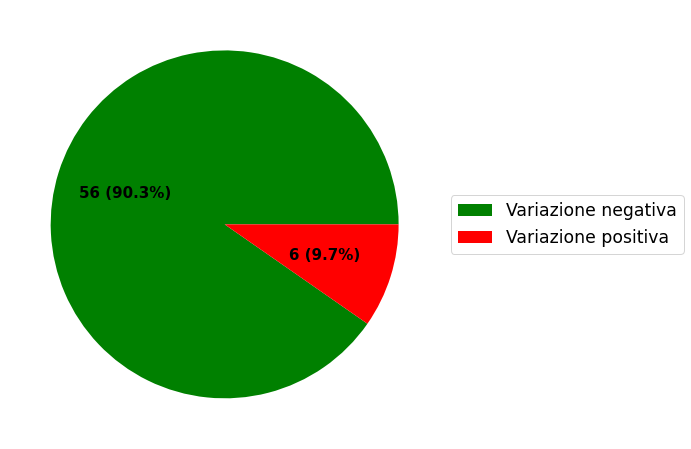

var mean -4.540734567079456 var rms 5.108987739234328
[]
96.0
96.0
33.550000111262
32.16562501589457


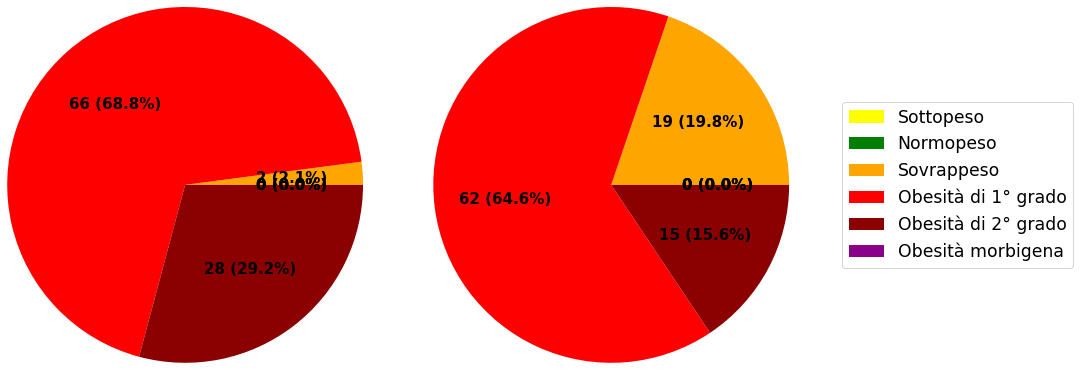

var neg 77.0 var pos 20.0
97.0


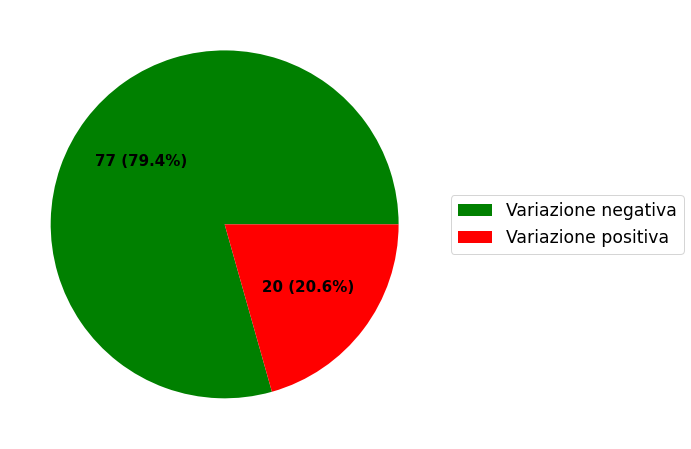

var mean -4.095167362370957 var rms 6.319747446648707
[]
662.0
662.0
25.9782477059033
25.248489408694727


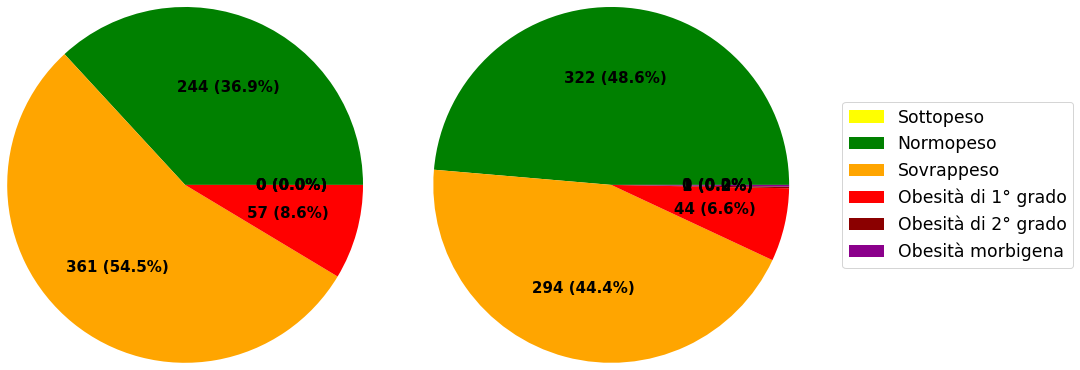

var neg 496.0 var pos 173.0
669.0


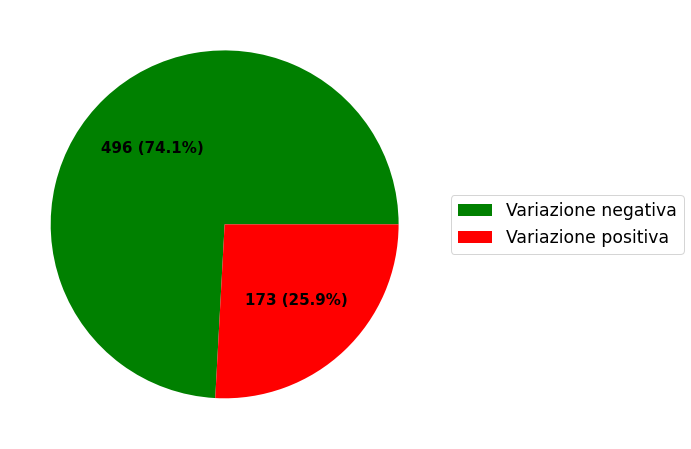

var mean -2.8676609498181023 var rms 5.666067238066905
[]
1.0
1.0
39.70000076293945
39.400001525878906


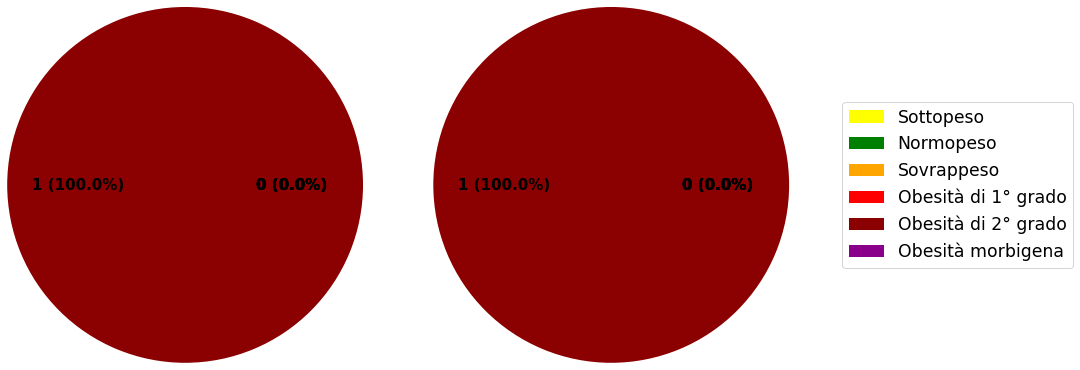

var neg 1.0 var pos 0.0
1.0


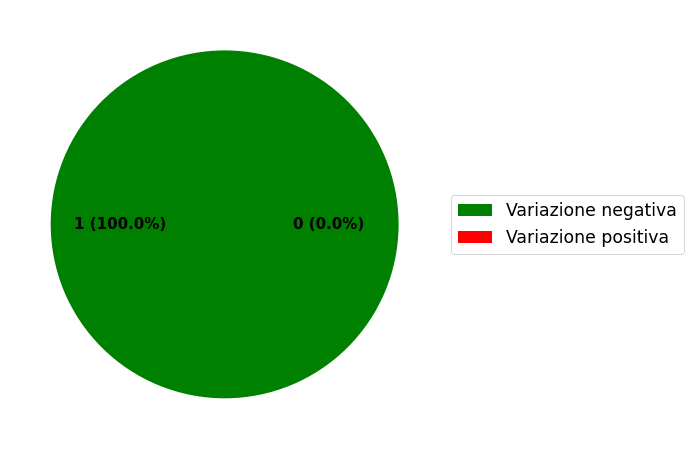

var mean -0.7556655700132899 var rms 0.0
[]
6.0
6.0
35.13333384195963
33.66666634877523


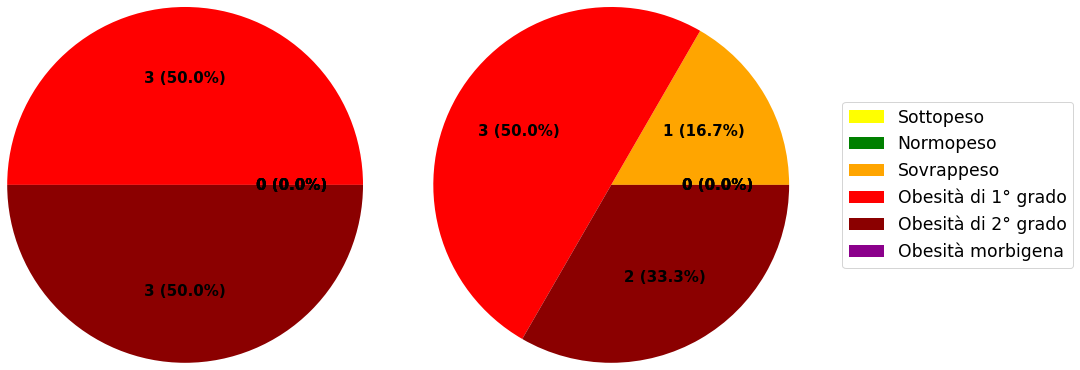

var neg 6.0 var pos 0.0
6.0


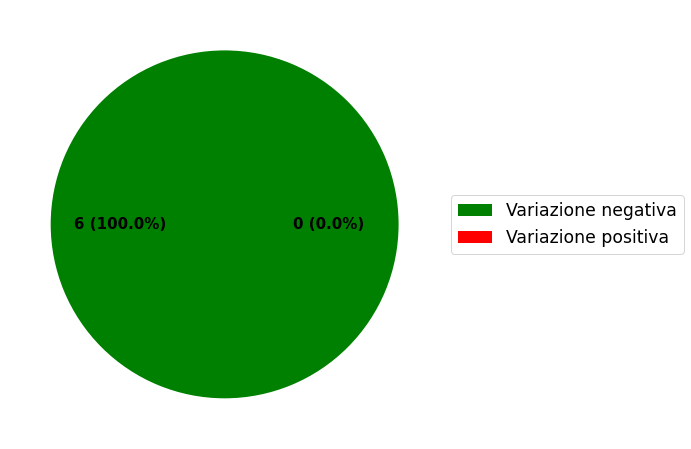

var mean -4.293767331813641 var rms 2.9556735755976287
[]
22.0
22.0
19.072727420113303
19.45909092643044


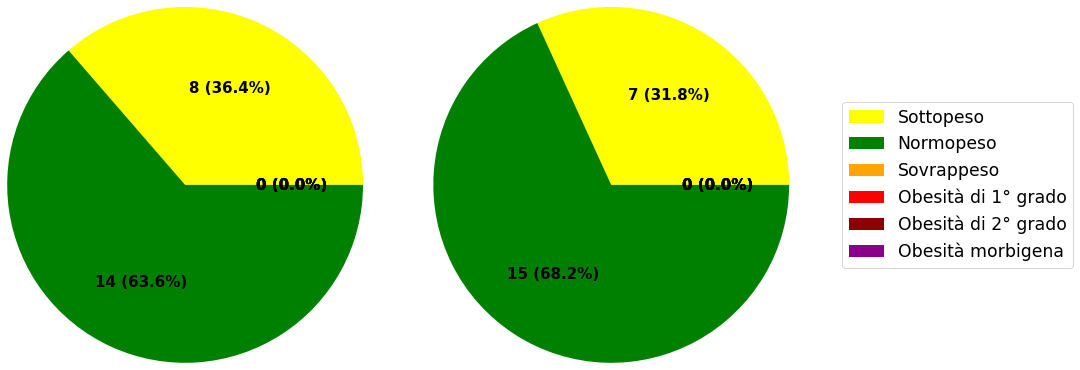

var neg 7.0 var pos 15.0
22.0


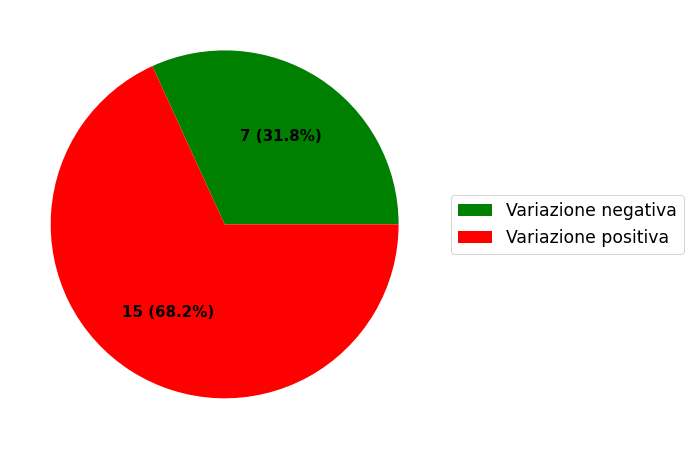

var mean 2.2293263492693747 var rms 4.070214356964872


Info in <TCanvas::Print>: png file BMI0.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst0_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst0_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst0_gend1_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI1.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst1_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst1_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst1_gend1_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI2.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst2_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst2_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_BMI_clst2_gend1_vs_visite_profile.png has been created
Info in <TCan

In [35]:
for cluster in range(11):
    percentuali(tree, cluster, branch, bmi_first, bmi_last, donna, colors, labels)

In [9]:
branch = "WHR"
xarray = array('f', [0.6, 0.8, 0.9, 1.0, 1.2, 1.3])
whr_first = ROOT.TH1F("whr_first", ";WHR;", len(xarray)-1, xarray)
whr_last = ROOT.TH1F("whr_last", ";WHR;", len(xarray)-1, xarray)
colors = ['yellow', 'green', 'orange', 'red', 'darkred', 'darkmagenta']
labels = ['Basso', 'Nella media', 'In aumento', 'Alto', 'Molto alto']
labels = ['Low', 'Average', 'Increasing', 'High', 'Very high']

[]
412.0
412.0
0.9717718414889956
0.9518203861215739


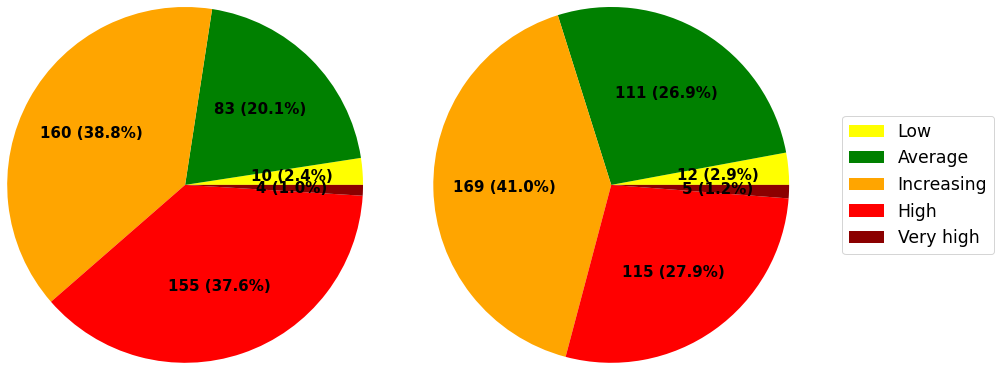

var neg 267.0 var pos 145.0
412.0


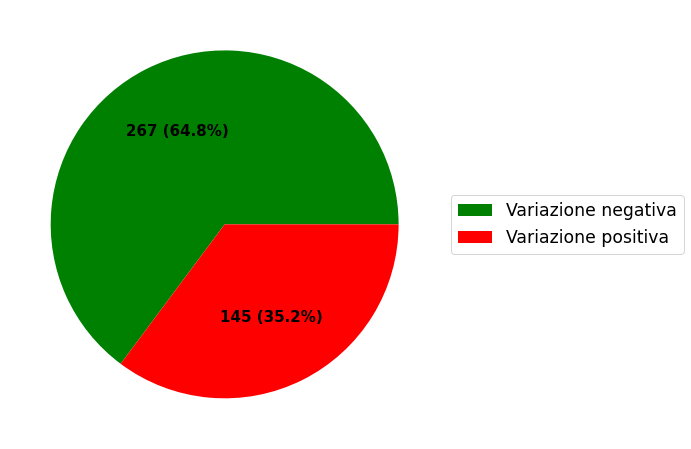

var mean -1.9350552257478637 var rms 4.989319874708422
[]
4.0
4.0
1.0850000083446503
1.1225000023841858


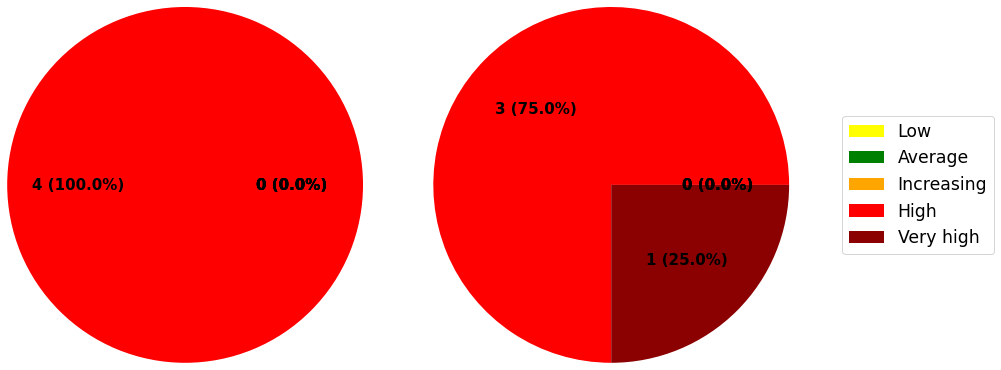

var neg 1.0 var pos 3.0
4.0


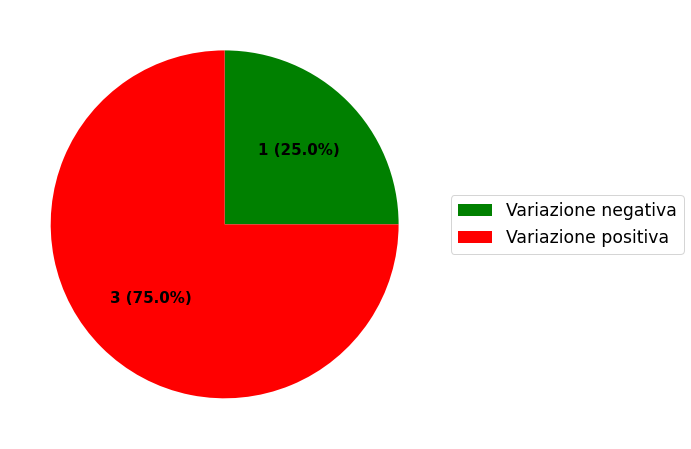

var mean 3.489656758207964 var rms 3.795285325809645
[]
15.0
15.0
1.0713333209355673
1.0493333299954732


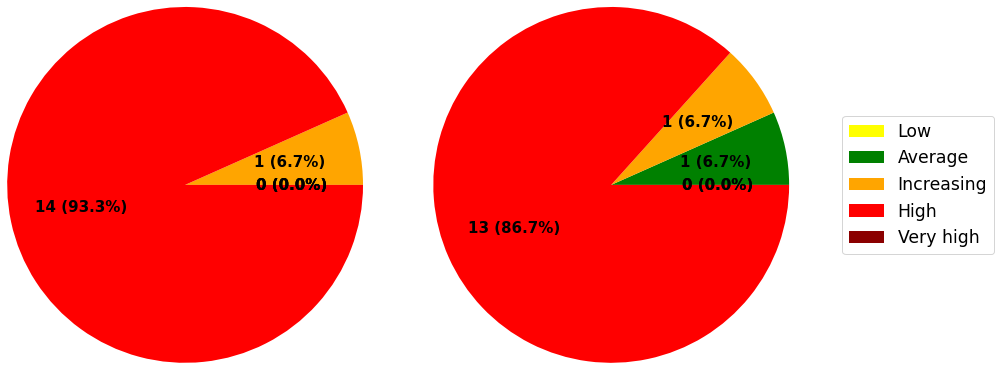

var neg 12.0 var pos 3.0
15.0


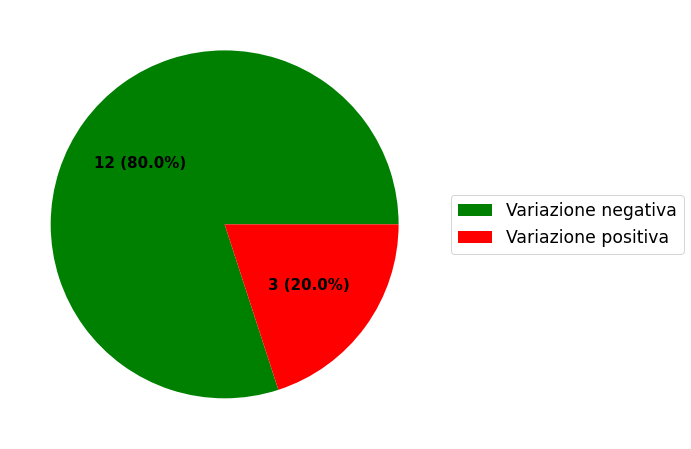

var mean -2.082090830701498 var rms 3.456630987546953
[]
2.0
2.0
1.0199999809265137
0.9750000238418579


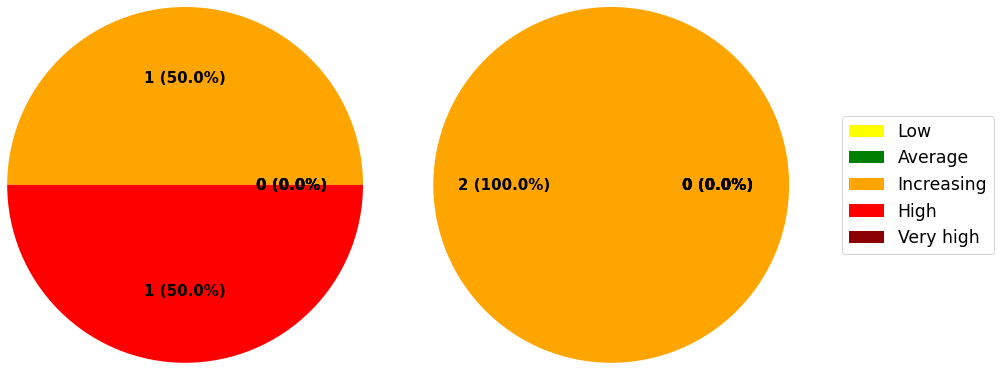

var neg 2.0 var pos 0.0
2.0


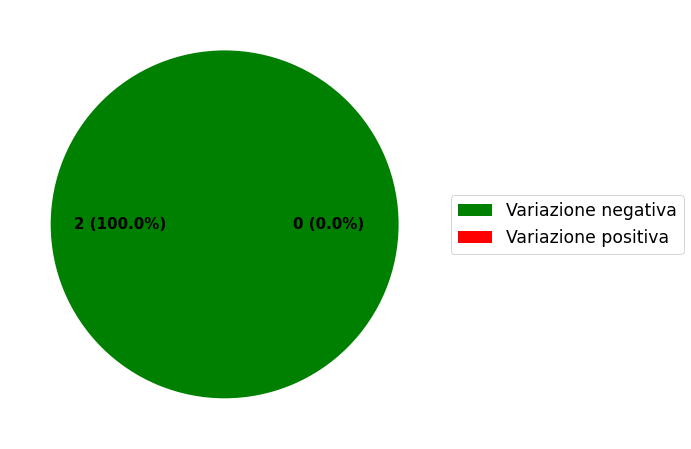

var mean -4.314570368012407 var rms 3.3044703309491554
[]
6.0
6.0
1.0449999968210857
1.0683333277702332


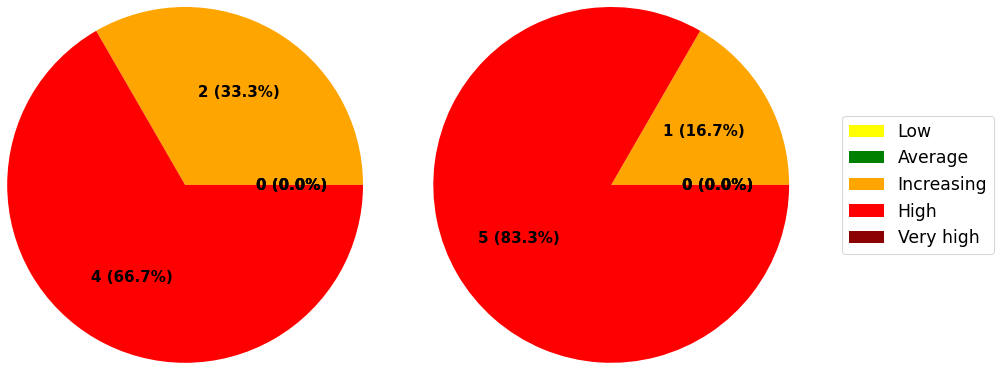

var neg 3.0 var pos 3.0
6.0


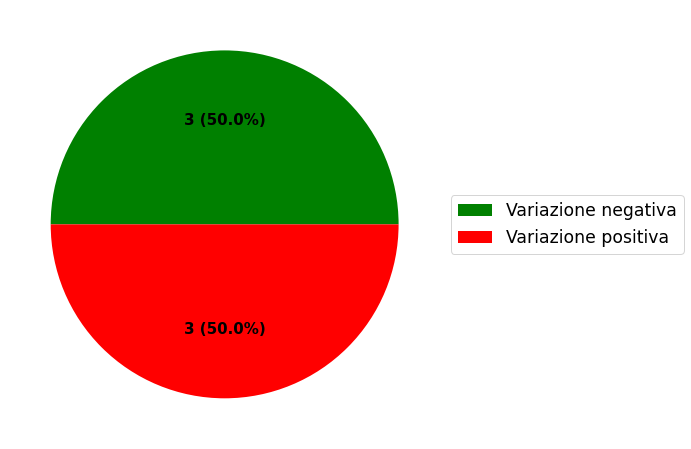

var mean 2.5487869772106344 var rms 4.382589509327883
[]
239.0
239.0
0.9379079466584337
0.9193305425564116


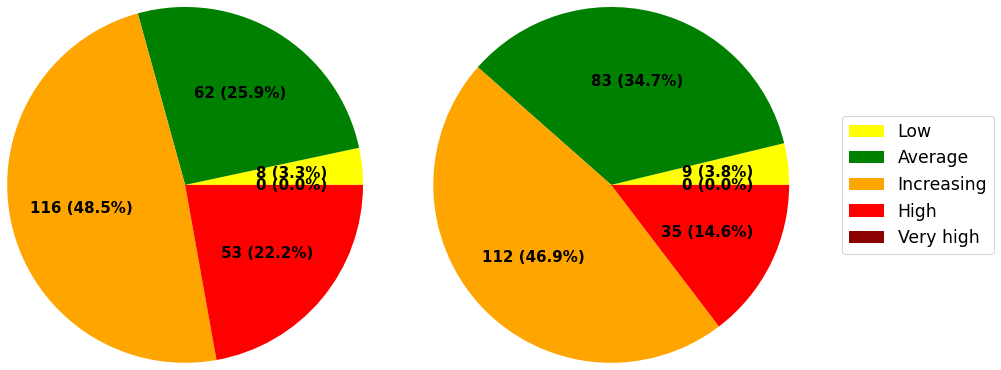

var neg 152.0 var pos 87.0
239.0


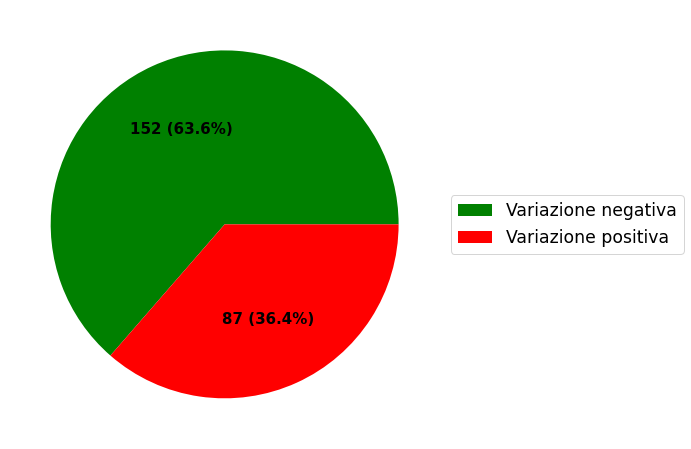

var mean -1.8113199653006167 var rms 5.257059915264455
[]
11.0
11.0
0.9881818240339105
0.9609090848402544


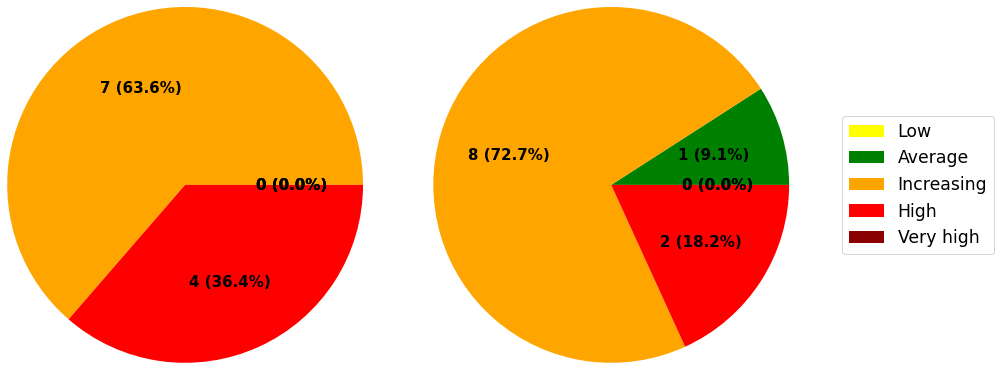

var neg 8.0 var pos 3.0
11.0


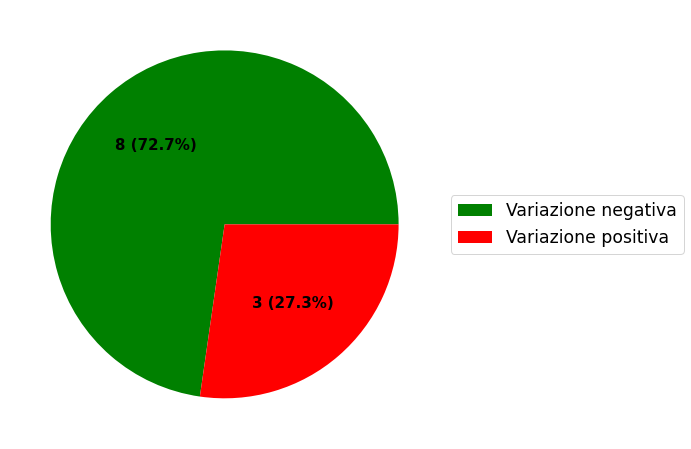

var mean -2.6903699423487577 var rms 3.8399175267749603
[]
45.0
45.0
0.896888890531328
0.8786666644944086


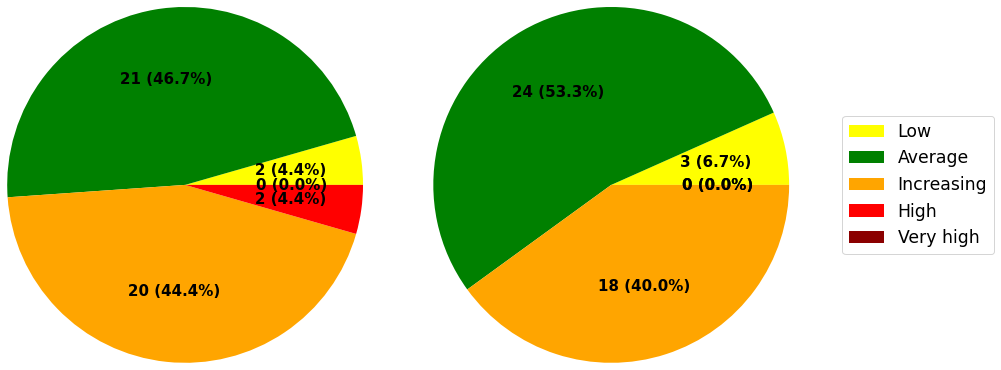

var neg 33.0 var pos 12.0
45.0


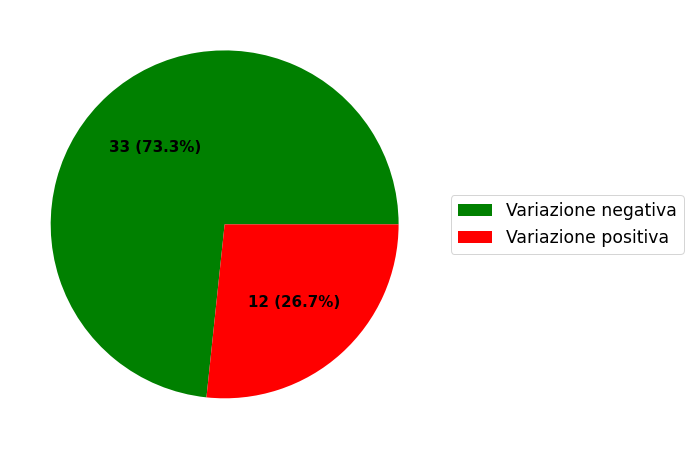

var mean -1.9721861514945422 var rms 2.8344374136553347
[]
23.0
23.0
1.1152173850847327
1.0969565225684124


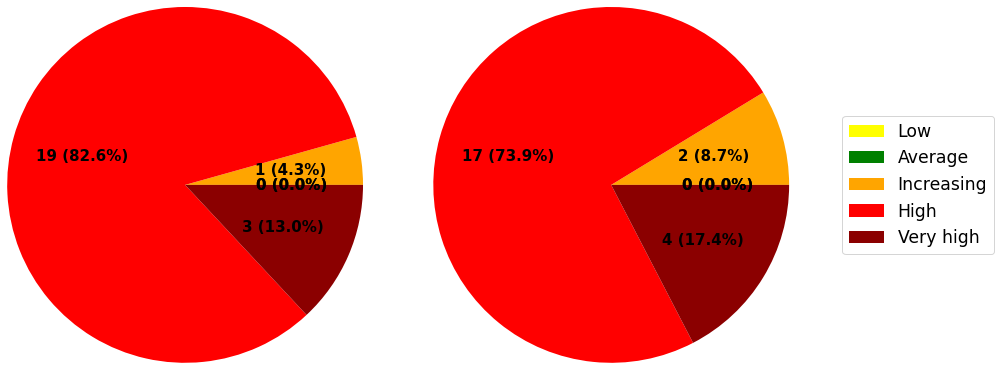

var neg 12.0 var pos 11.0
23.0


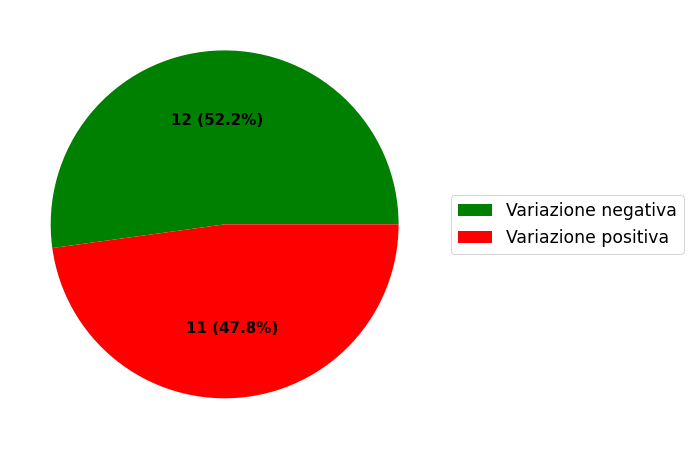

var mean -1.6860461089677783 var rms 4.233389655915772
[]
67.0
67.0
1.0538805918907053
1.0223880534741416


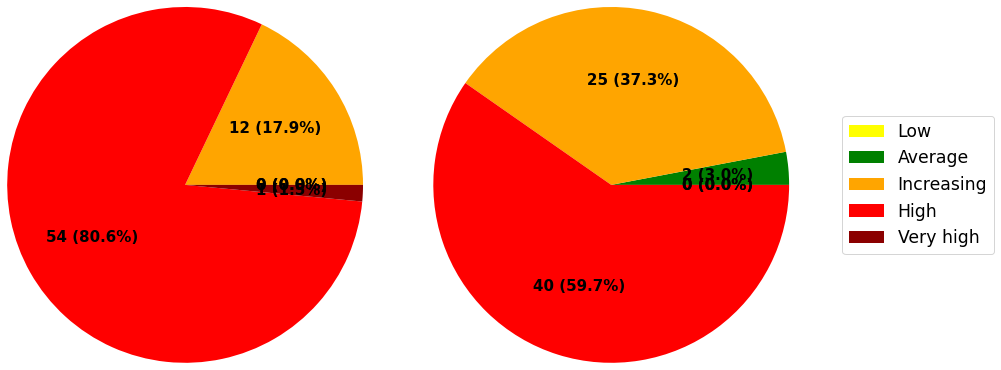

var neg 44.0 var pos 23.0
67.0


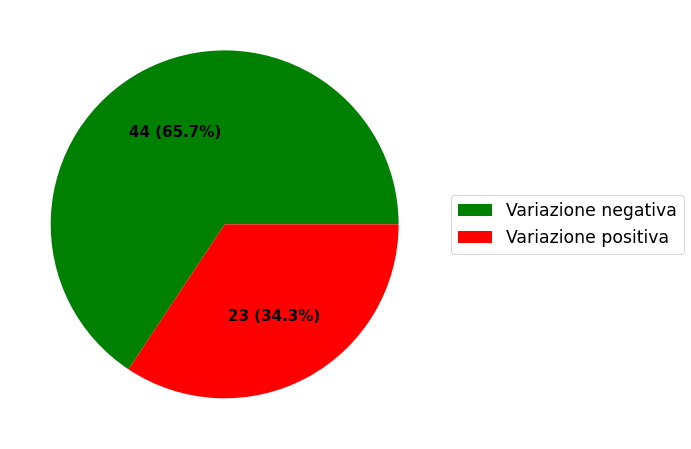

var mean -2.9344271688279133 var rms 5.480912310281705
[]
12.0
12.0
0.7733333309491476
0.7758333285649618


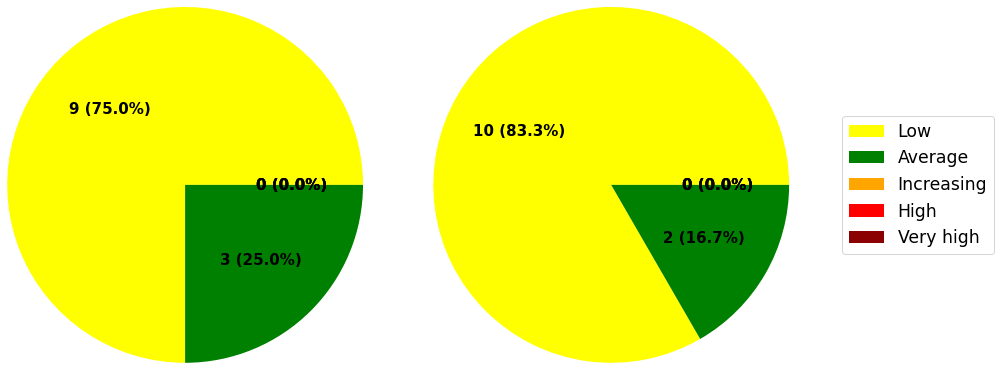

var neg 3.0 var pos 9.0
12.0


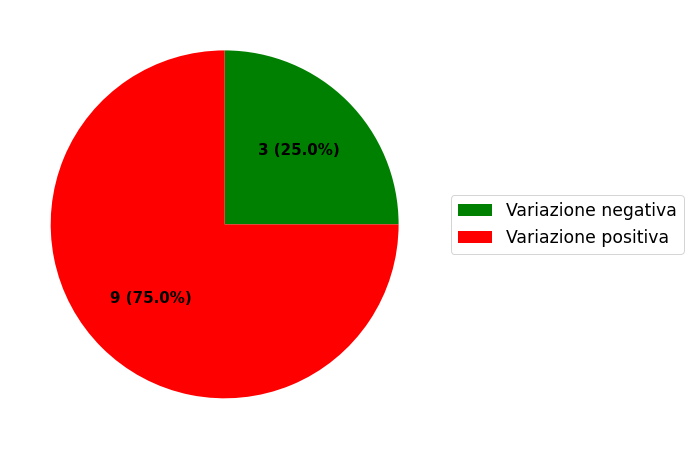

var mean 0.3579979302815511 var rms 2.112912073604361


Info in <TCanvas::Print>: png file BMI0.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst0_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst0_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst0_gend0_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI1.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst1_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst1_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst1_gend0_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI2.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst2_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst2_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst2_gend0_vs_visite_profile.png has been created
Info in <TCan

In [10]:
for cluster in range(11):
    percentuali(tree, cluster, branch, whr_first, whr_last, uomo, colors, labels)

[]
424.0
424.0
0.9661556572284339
0.9468396203416698


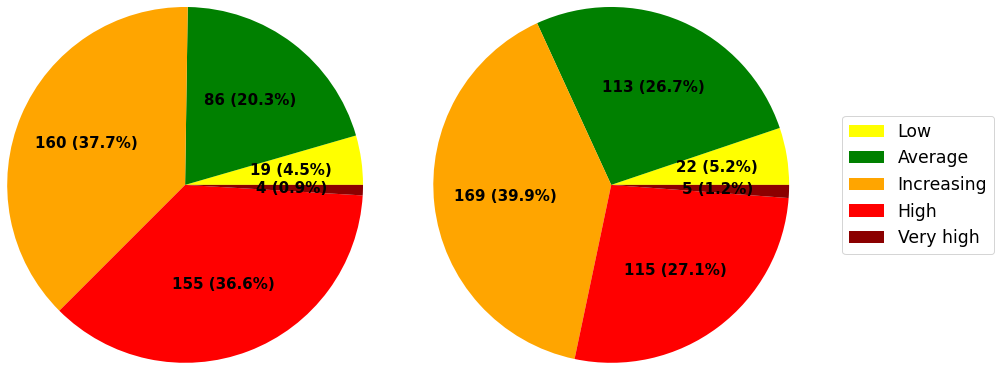

var neg 270.0 var pos 154.0
424.0


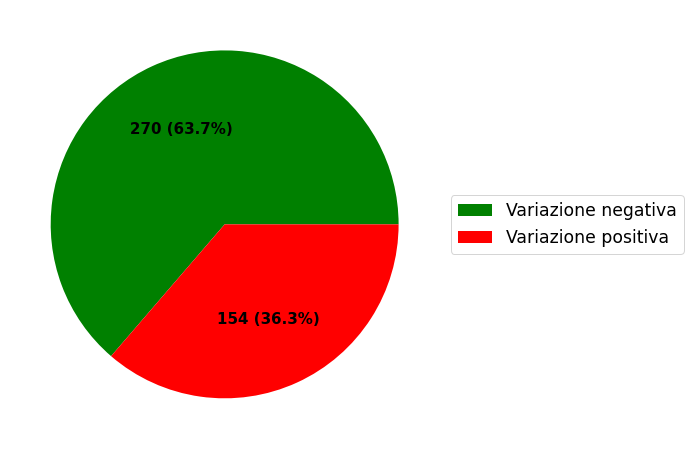

var mean -1.8701574949168425 var rms 4.945678739341884


Info in <TCanvas::Print>: png file BMI-1.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst-1_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst-1_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst-1_gend0_vs_visite_profile.png has been created


In [11]:
percentuali(tree, -1, branch, whr_first, whr_last, uomo, colors, labels)

In [31]:
branch = "WHR"
xarray = array('f', [0.7, 0.8, 0.9, 1.0, 1.2, 1.3])
whr_first = ROOT.TH1F("whr_first_w", ";WHR;", len(xarray)-1, xarray)
whr_last = ROOT.TH1F("whr_last_w", ";WHR;", len(xarray)-1, xarray)
colors = ['yellow', 'green', 'orange', 'red', 'darkred', 'darkmagenta']
colors = ['green', 'orange', 'red', 'darkred', 'darkmagenta']
labels = ['Basso', 'Nella media', 'In aumento', 'Alto', 'Molto alto', 'Estremamente alto']
labels = ['Average', 'Increasing', 'High', 'Very high', 'Extremely high']

Warning in <TFile::Append>: Replacing existing TH1: whr_first_w (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: whr_last_w (Potential memory leak).


[]
1180.0
1180.0
0.941254235930362
0.9274576266943398


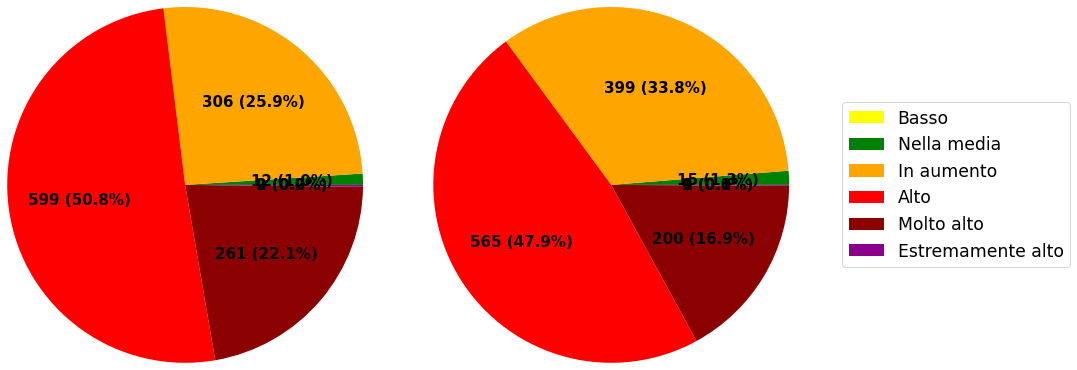

var neg 690.0 var pos 490.0
1180.0


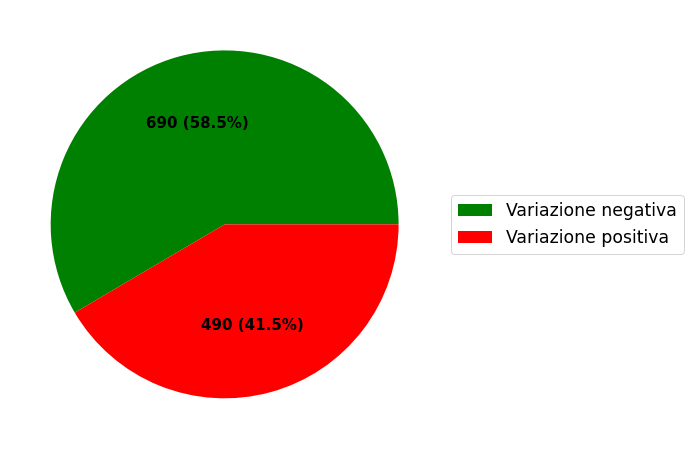

var mean -1.3668706441460996 var rms 4.437967825805513
[]
0.0
0.0
0.0
0.0


/tmp/ipykernel_989/3728006616.py:49: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_f, autopct=lambda pct: func(pct, data_f), textprops=dict(color="black"), colors=colors, radius=1.5) #, frame=True
/tmp/ipykernel_989/3728006616.py:56: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_l, autopct=lambda pct: func(pct, data_l), textprops=dict(color="black"), colors=colors, radius=1.5) #, frame=True


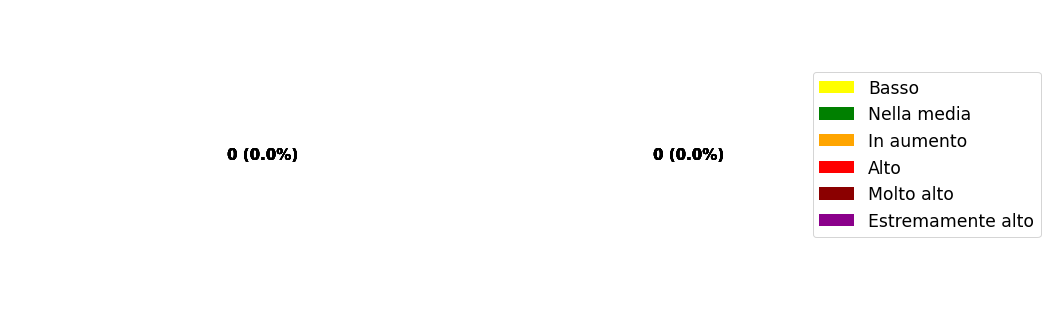

var neg 0.0 var pos 0.0
0.0


/tmp/ipykernel_989/3728006616.py:82: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_var, autopct=lambda pct: func(pct, data_var), textprops=dict(color="black"), colors=["green", "red"], radius=1) #, frame=True


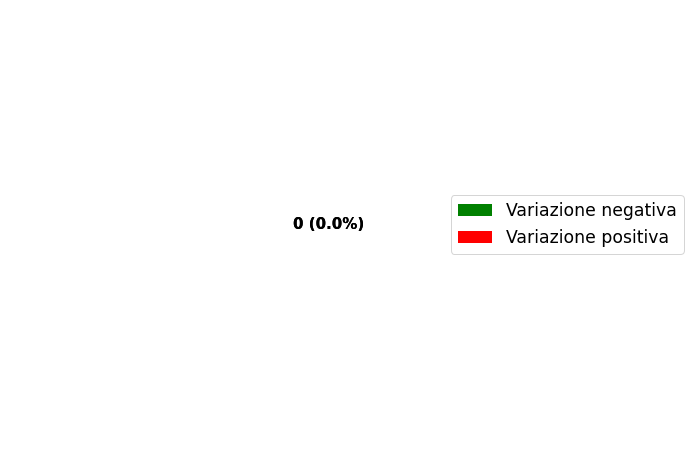

var mean 0.0 var rms 0.0
[]
121.0
121.0
1.0328925567224991
1.0130578535647432


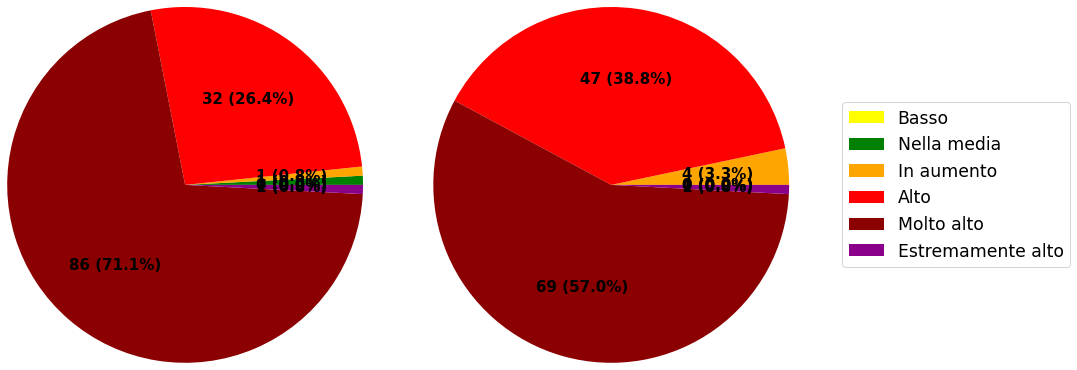

var neg 71.0 var pos 50.0
121.0


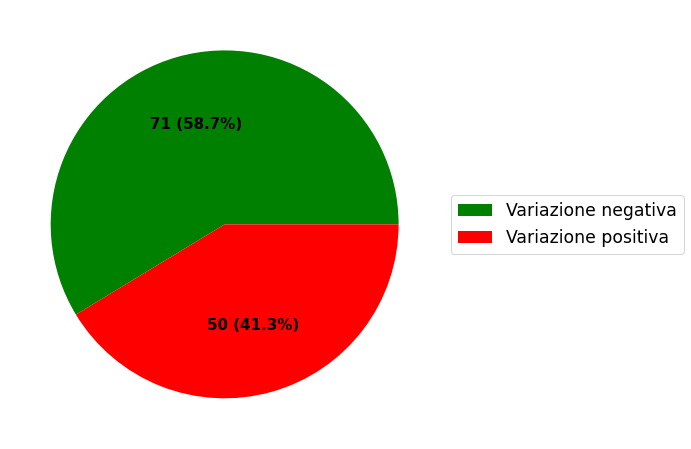

var mean -1.746628346416905 var rms 5.427988180480806
[]
222.0
222.0
0.9726126105398745
0.9521171160646387


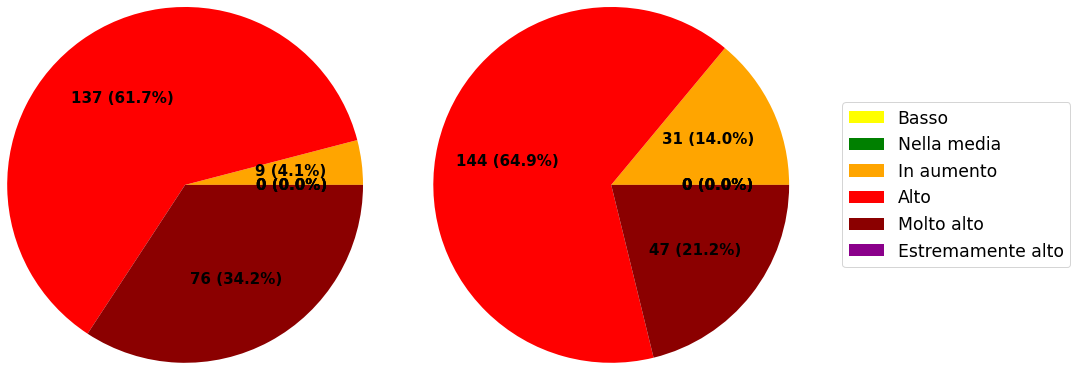

var neg 142.0 var pos 80.0
222.0


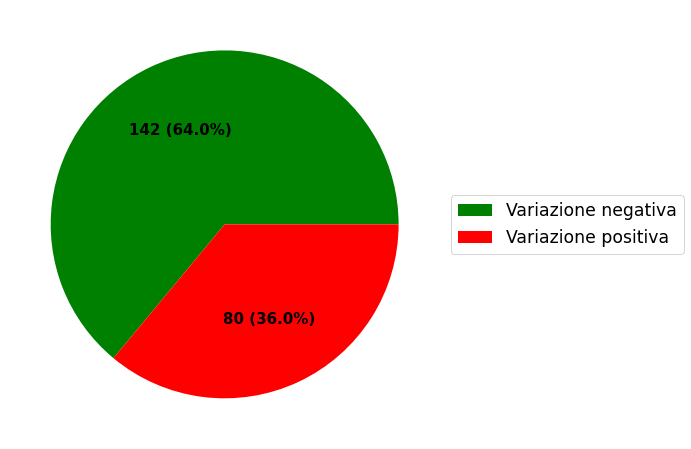

var mean -2.0264223964444184 var rms 4.032457047726015
[]
10.0
10.0
1.0429999887943269
1.0639999985694886


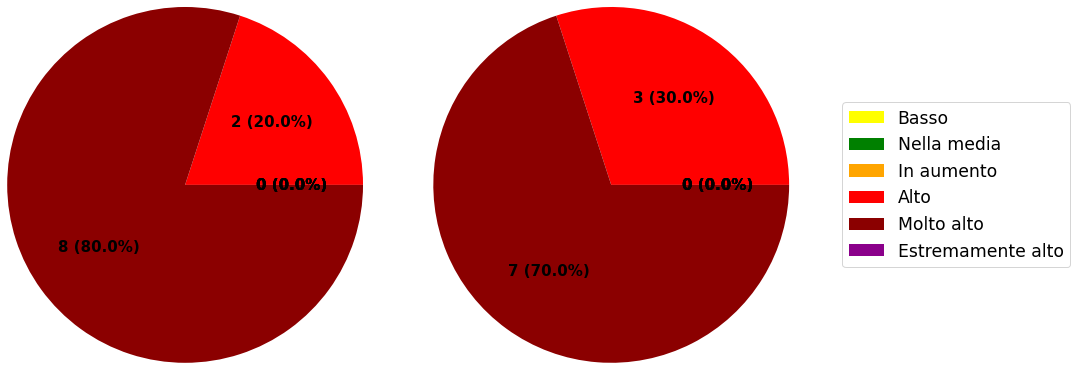

var neg 4.0 var pos 6.0
10.0


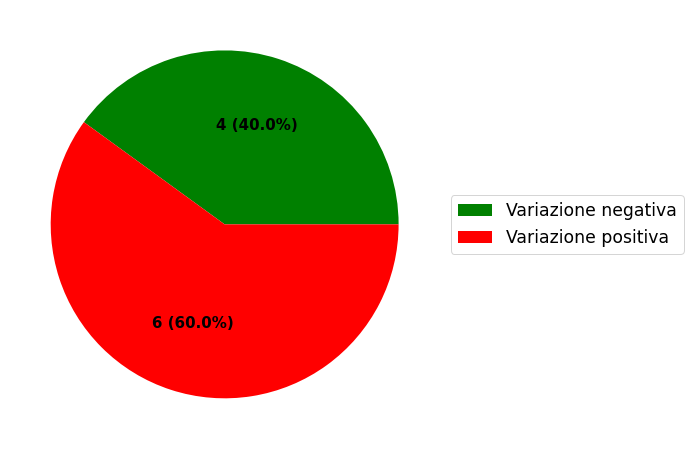

var mean 2.066785381170448 var rms 5.54927666524832
[]
62.0
62.0
0.9635483843664969
0.9487096715357995


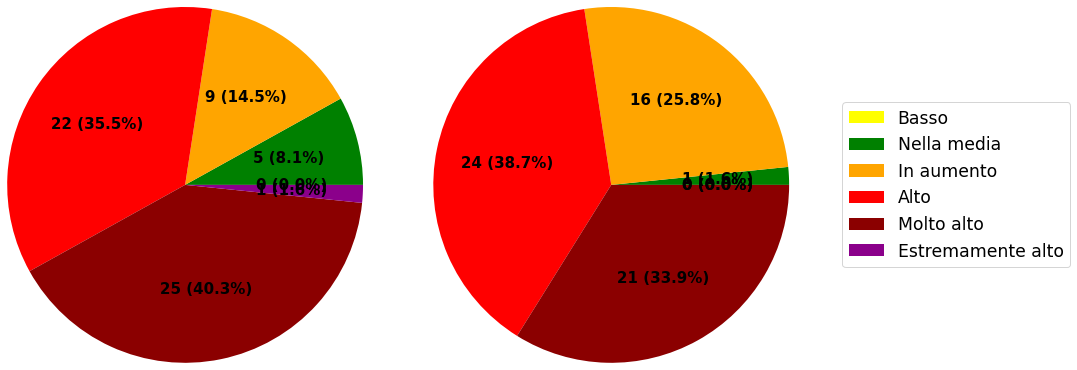

var neg 37.0 var pos 25.0
62.0


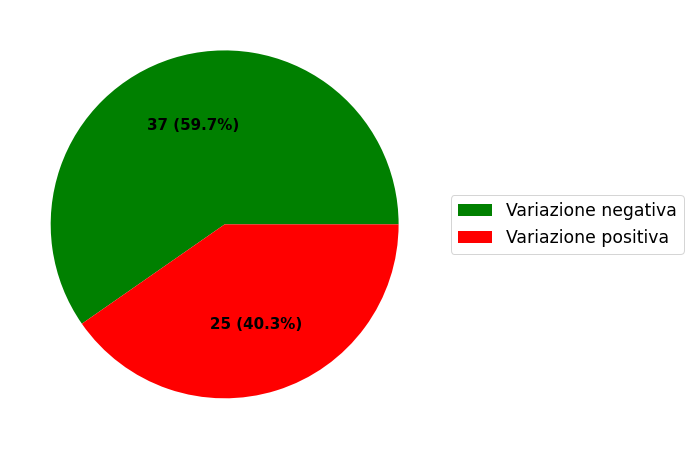

var mean -1.3861034388657083 var rms 5.083198439529839
[]
96.0
96.0
0.9852083269506693
0.9735416627178589


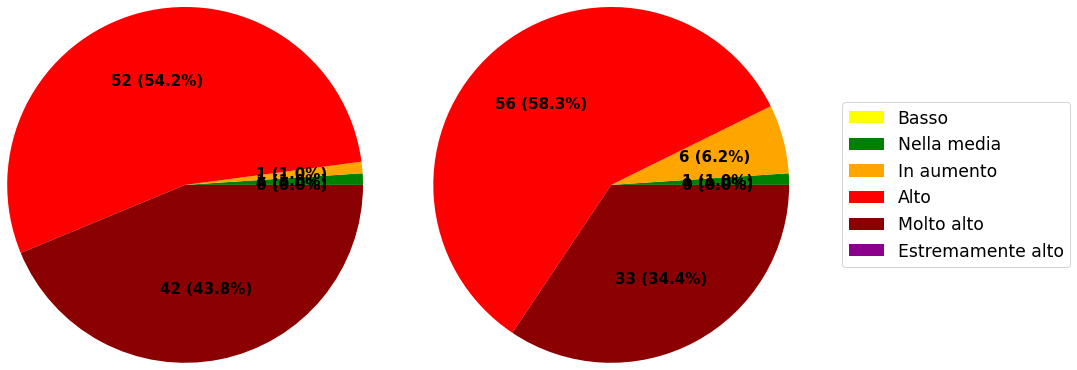

var neg 55.0 var pos 41.0
96.0


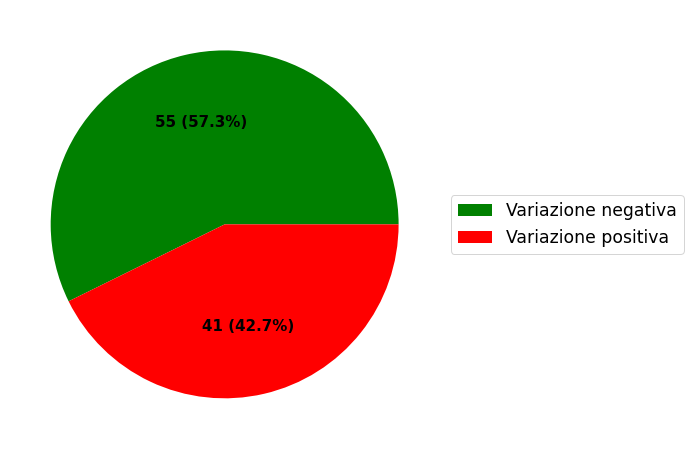

var mean -1.1287889507636626 var rms 4.559170386389694
[]
662.0
662.0
0.9027190339889412
0.8914803631176041


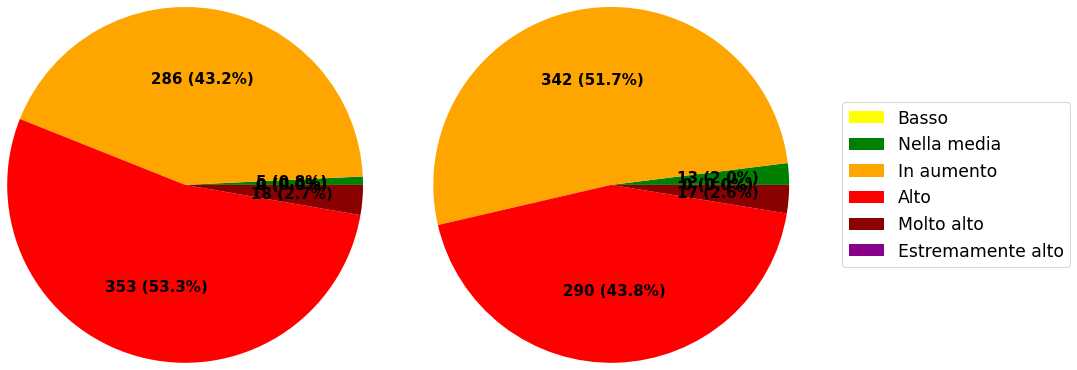

var neg 378.0 var pos 284.0
662.0


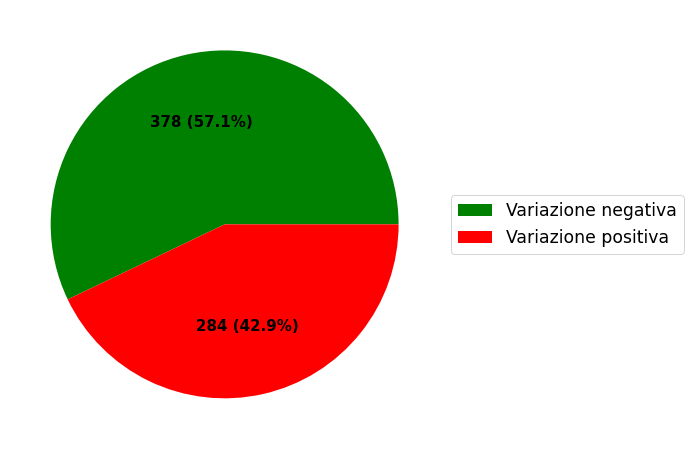

var mean -1.1665659680376126 var rms 4.230772856172591
[]
1.0
1.0
1.149999976158142
1.1699999570846558


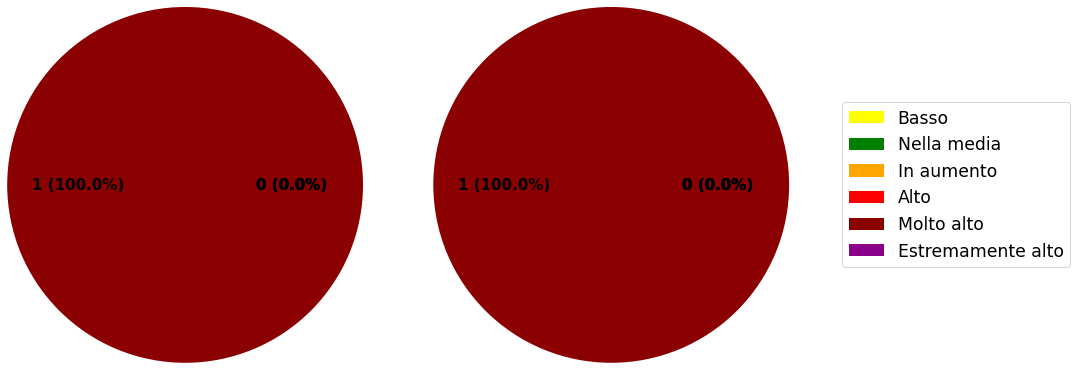

var neg 0.0 var pos 1.0
1.0


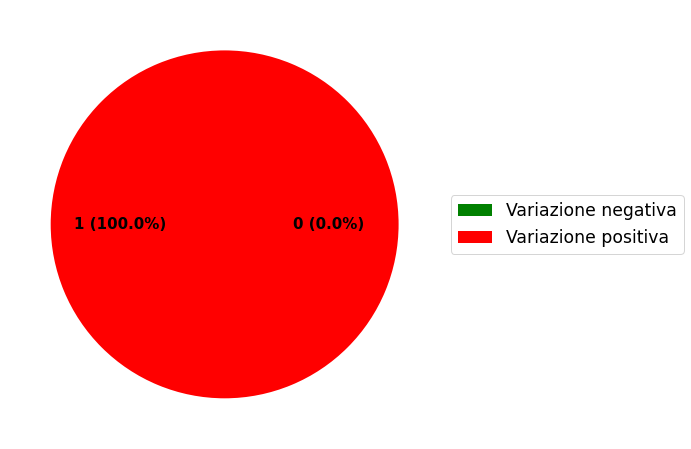

var mean 1.7391288122742863 var rms 0.0
[]
6.0
6.0
1.0466666519641876
1.033333311478297


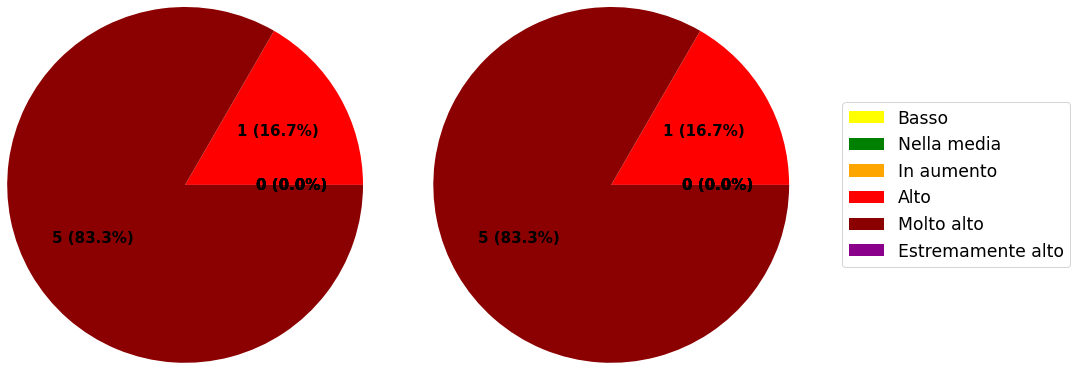

var neg 3.0 var pos 3.0
6.0


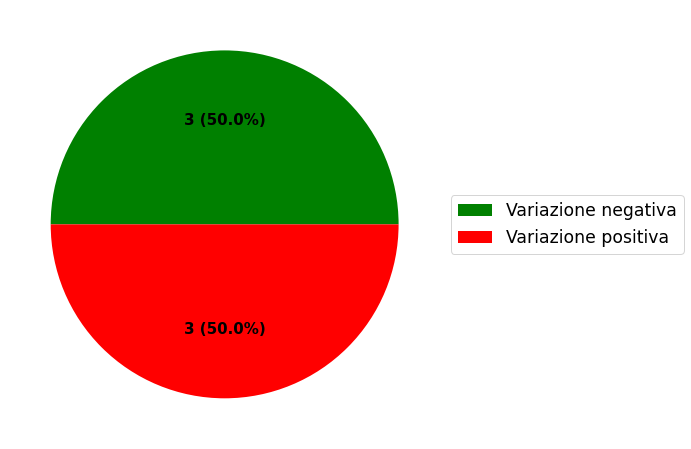

var mean -1.256286244230801 var rms 2.494627599450161
[]
22.0
22.0
0.7950000004334883
0.7949999977241863


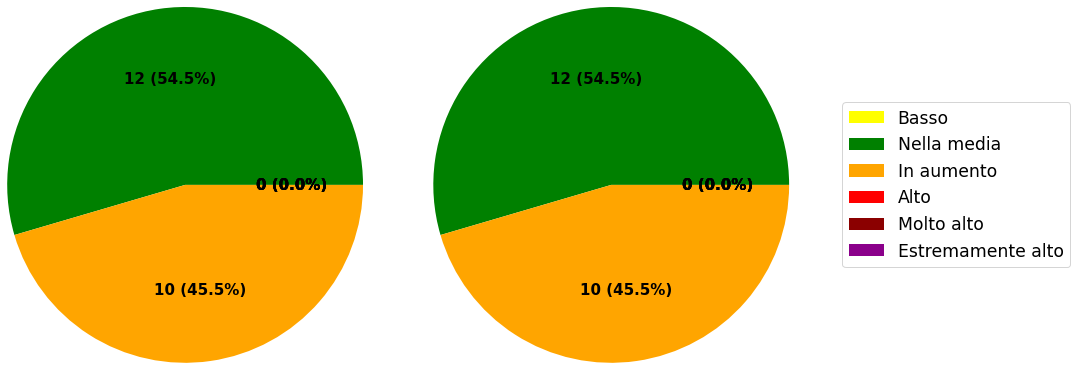

var neg 11.0 var pos 11.0
22.0


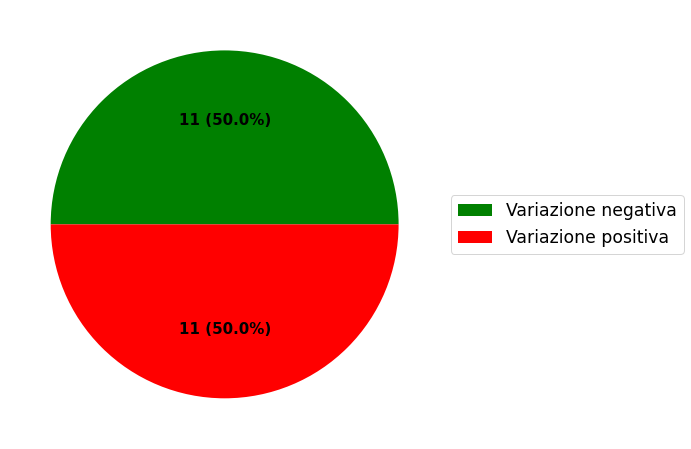

var mean 0.02349608983960505 var rms 2.5063121153455485


Info in <TCanvas::Print>: png file BMI0.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst0_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst0_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst0_gend1_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI1.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst1_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst1_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst1_gend1_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI2.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst2_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst2_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst2_gend1_vs_visite_profile.png has been created
Info in <TCan

In [73]:
for cluster in range(11):
    percentuali(tree, cluster, branch, whr_first, whr_last, donna, colors, labels)

[]
1202.0
1202.0
0.9385773697232644
0.9250332774120242


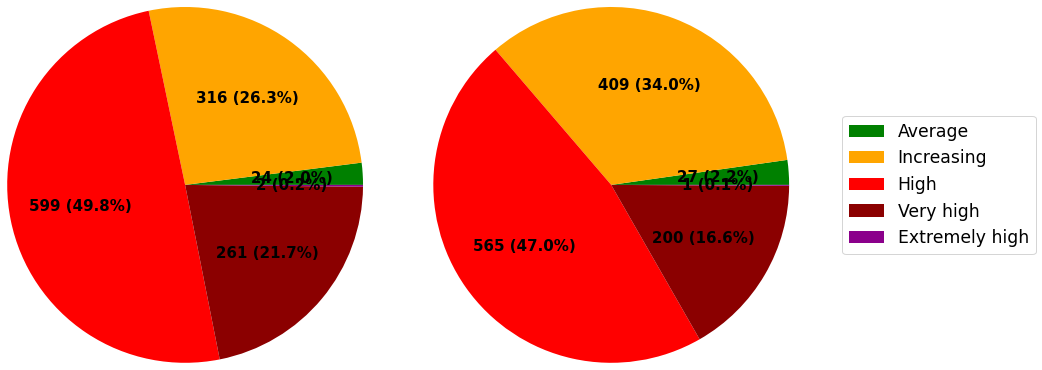

var neg 701.0 var pos 501.0
1202.0


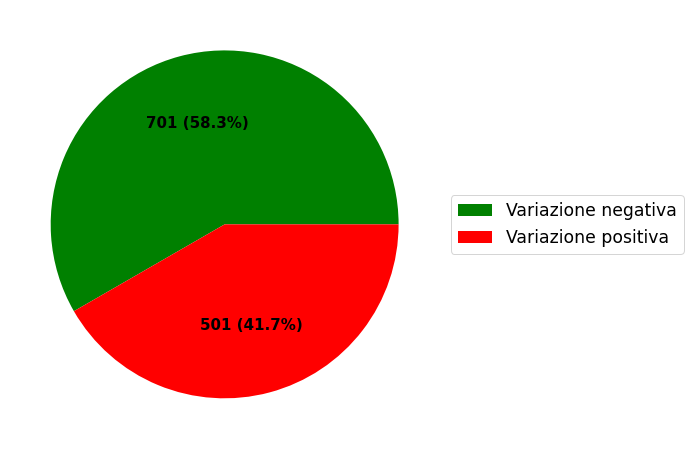

var mean -1.3414230000964444 var rms 4.414156660519051


Info in <TCanvas::Print>: png file BMI-1.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst-1_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst-1_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_WHR_clst-1_gend1_vs_visite_profile.png has been created


In [32]:
percentuali(tree, -1, branch, whr_first, whr_last, donna, colors, labels)

In [74]:
branch = "VFL"
xarray = array('f', [1, 9, 14, 30])
vfl_first = ROOT.TH1F("vfl_first", ";VFL;", len(xarray)-1, xarray)
vfl_last = ROOT.TH1F("vfl_last", ";VFL;", len(xarray)-1, xarray)
colors = ['green', 'orange', 'red']
labels = ['Normale', 'Alto', 'Molto alto']


Warning in <TFile::Append>: Replacing existing TH1: vfl_first (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: vfl_last (Potential memory leak).


[]
412.0
412.0
12.674757281553399
11.228155339805825


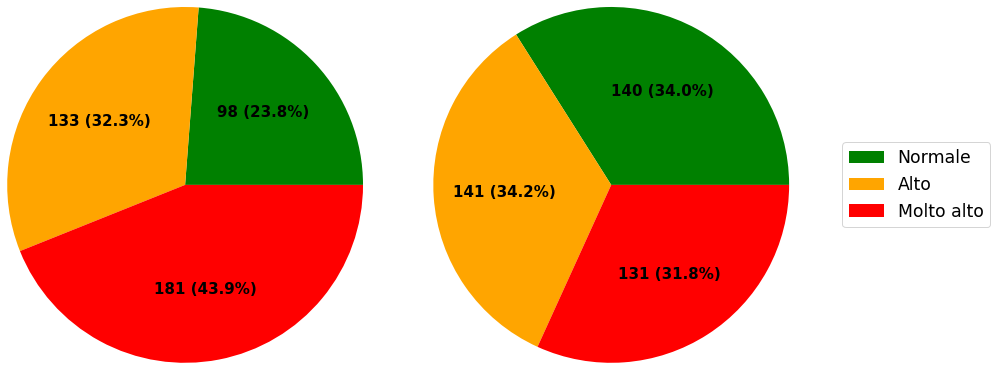

var neg 235.0 var pos 145.0
412.0


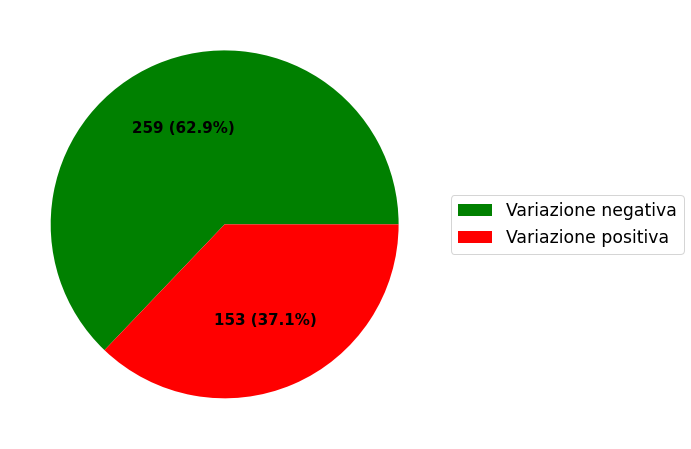

var mean -9.85754787325181 var rms 14.375777917825221
[]
4.0
4.0
20.0
20.0


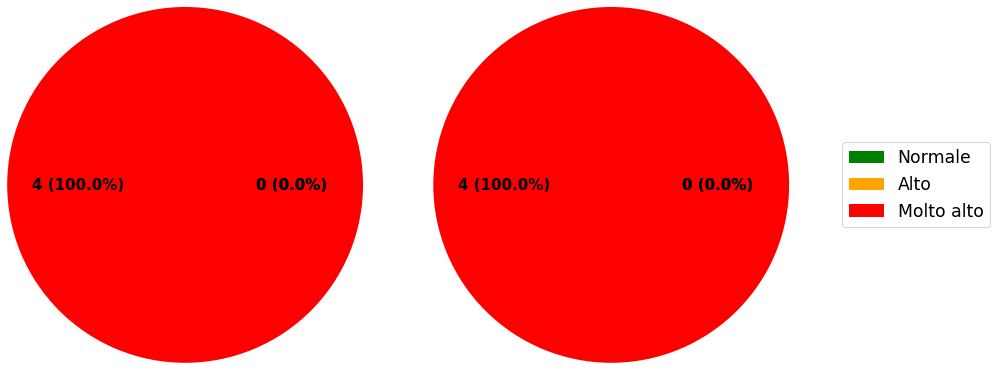

var neg 0.0 var pos 4.0
4.0


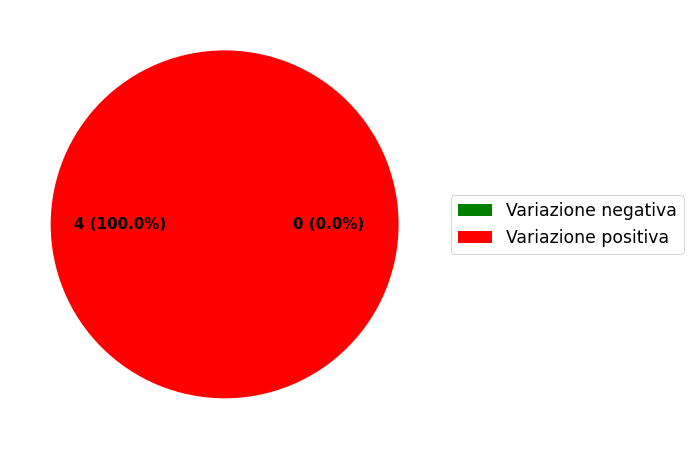

var mean 0.0 var rms 0.0
[]
15.0
15.0
19.866666666666667
18.6


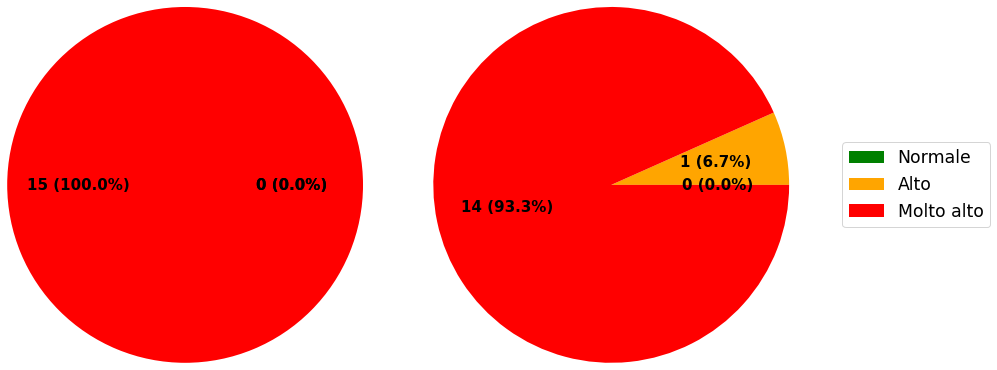

var neg 4.0 var pos 10.0
15.0


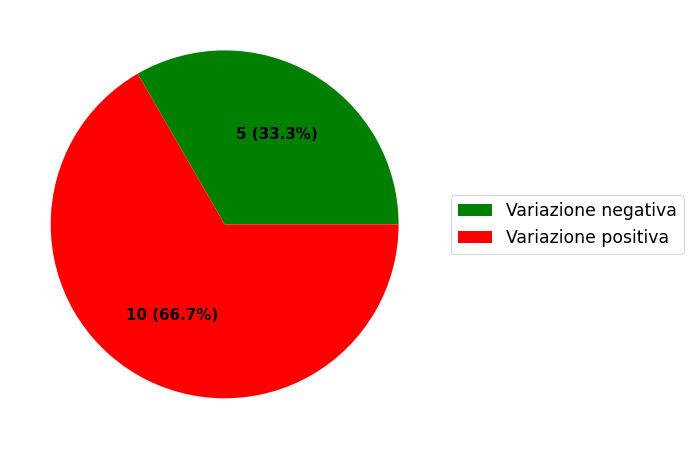

var mean -2.9365079365079367 var rms 5.019488349473618
[]
2.0
2.0
17.0
13.5


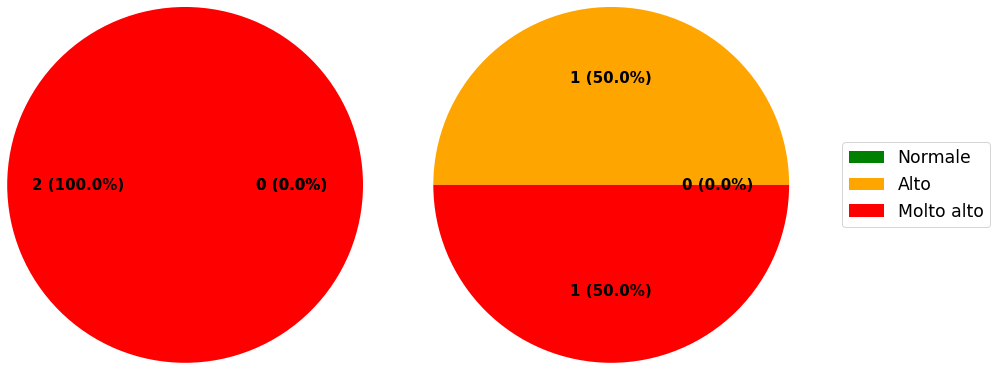

var neg 2.0 var pos 0.0
2.0


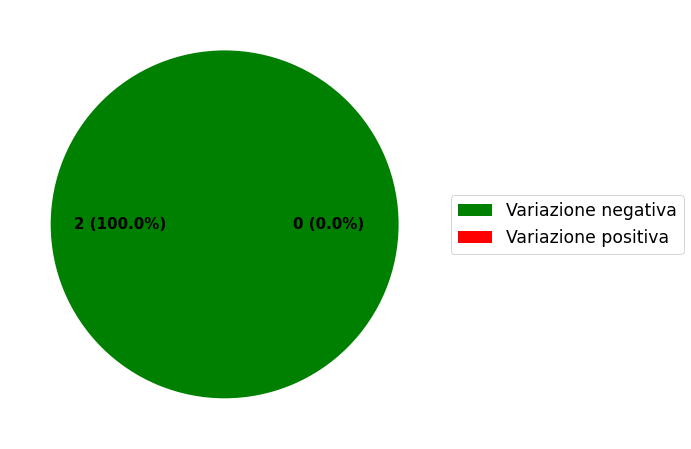

var mean -21.180555555555557 var rms 10.069444444444441
[]
6.0
6.0
20.0
20.0


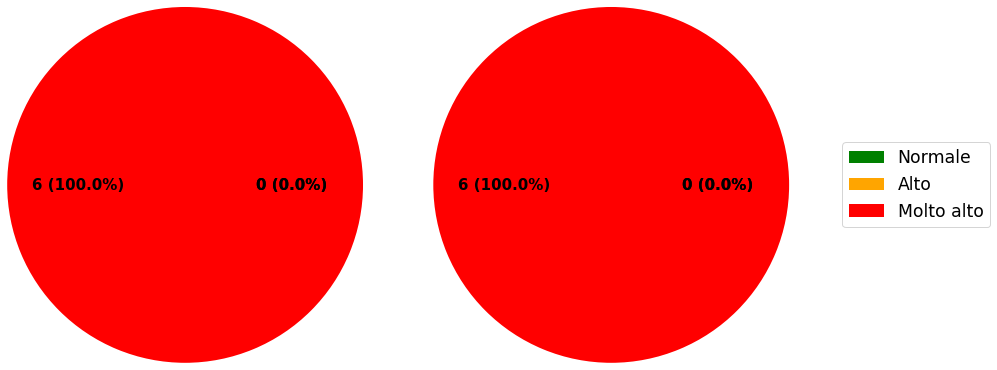

var neg 0.0 var pos 6.0
6.0


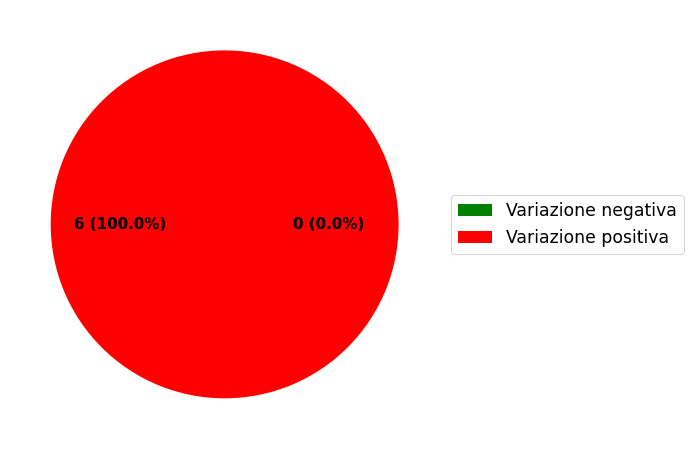

var mean 0.0 var rms 0.0
[]
239.0
239.0
10.096234309623432
8.861924686192468


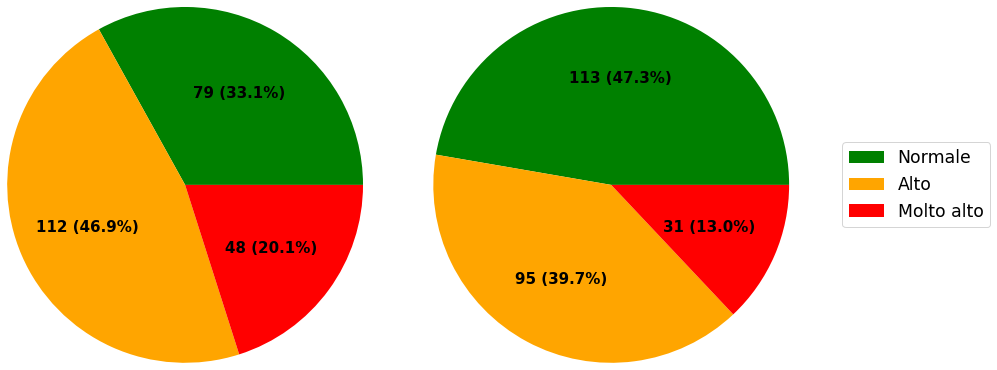

var neg 141.0 var pos 72.0
239.0


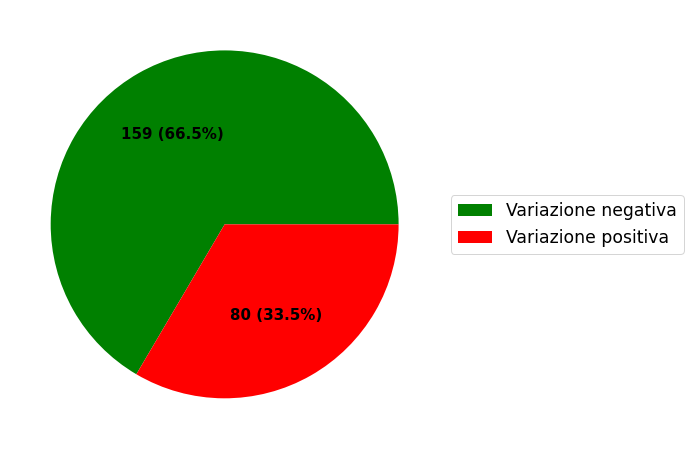

var mean -9.862611957682375 var rms 15.736441796039763
[]
11.0
11.0
19.09090909090909
17.636363636363637


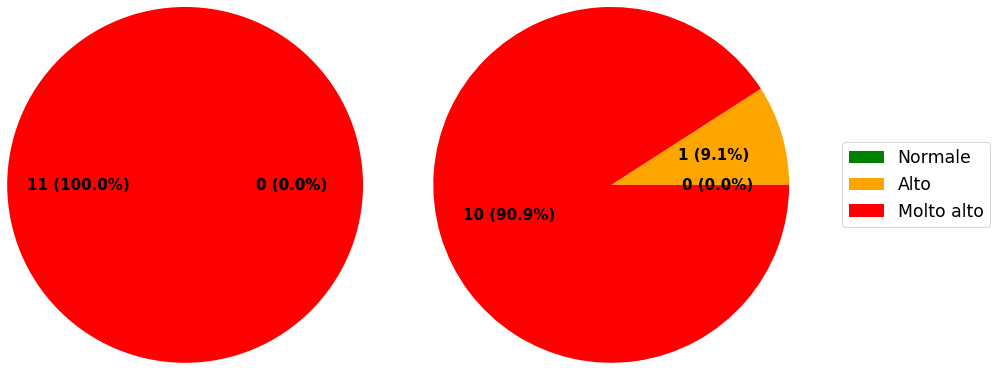

var neg 7.0 var pos 4.0
11.0


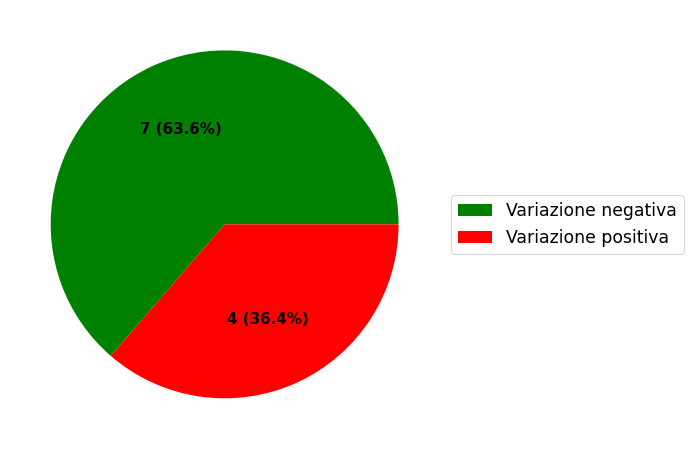

var mean -7.822653782406103 var rms 11.08307055887922
[]
45.0
45.0
9.488888888888889
7.955555555555556


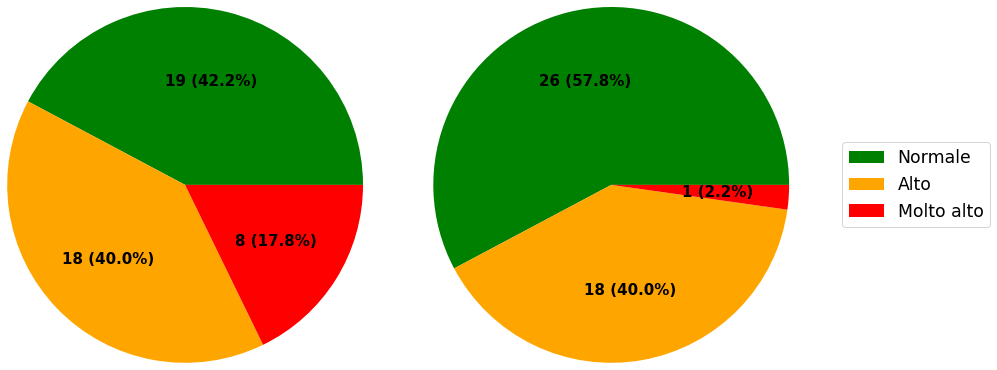

var neg 31.0 var pos 13.0
45.0


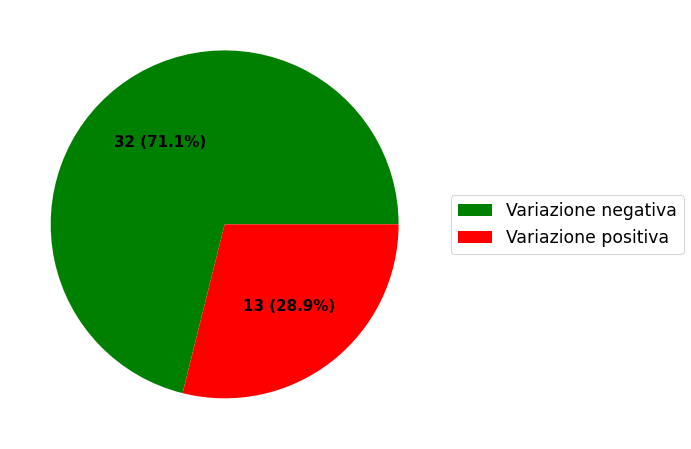

var mean -13.911151979333795 var rms 13.038200666864286
[]
23.0
23.0
19.91304347826087
18.608695652173914


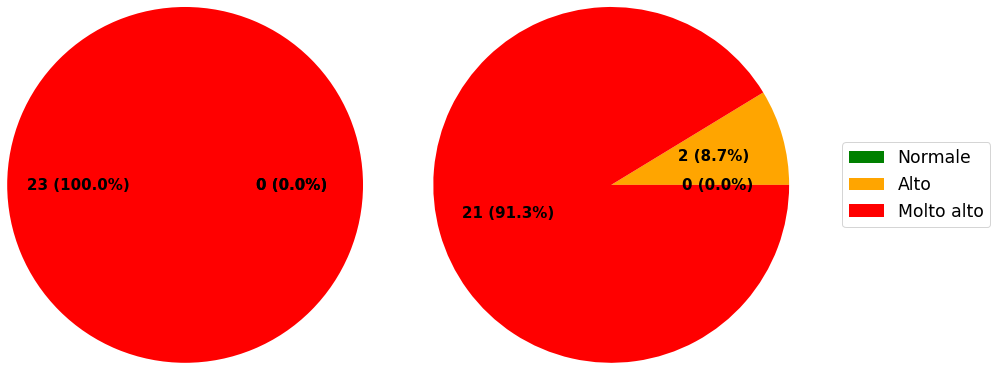

var neg 8.0 var pos 15.0
23.0


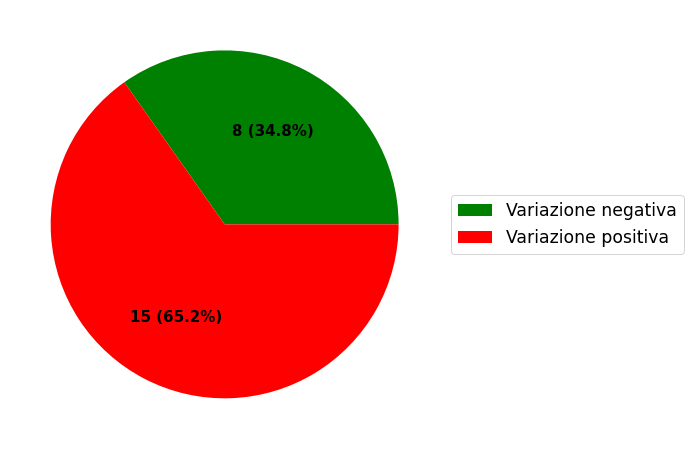

var mean -6.578947368421053 var rms 11.305274237324596
[]
67.0
67.0
17.64179104477612
15.253731343283581


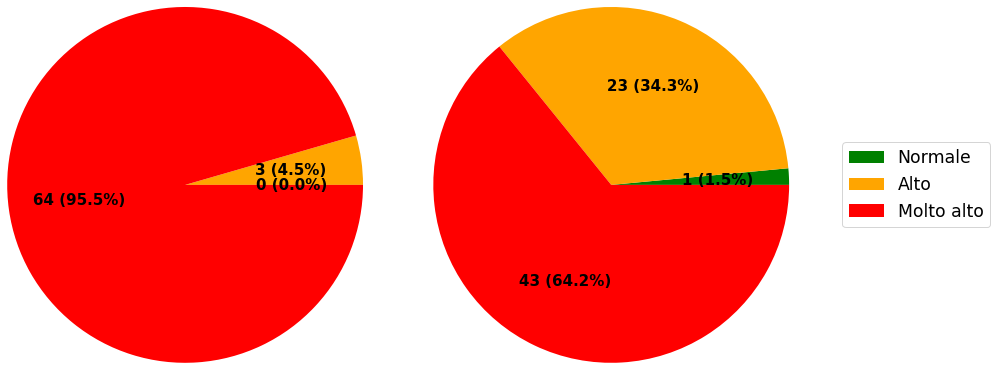

var neg 42.0 var pos 21.0
67.0


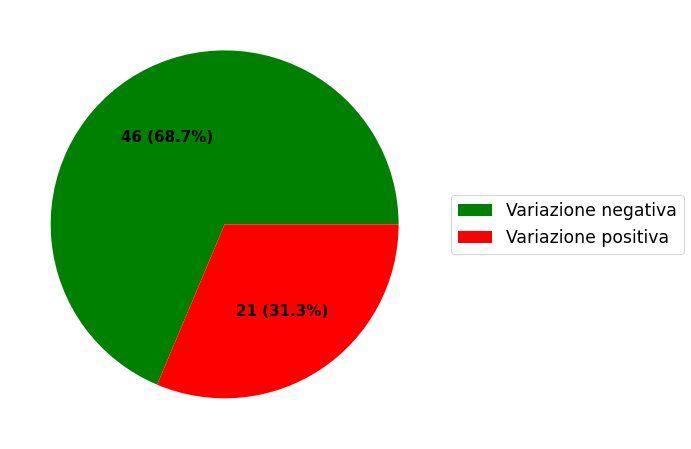

var mean -11.304824673909149 var rms 12.856342469155491
[]
12.0
12.0
2.3333333333333335
2.0833333333333335


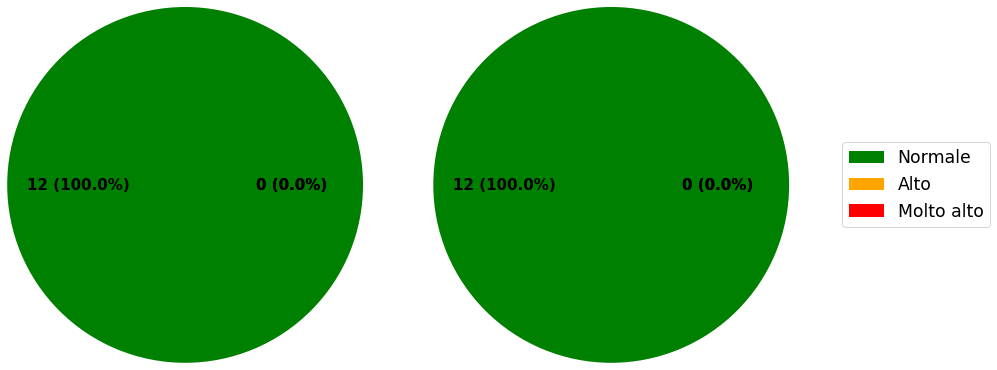

var neg 1.0 var pos 8.0
12.0


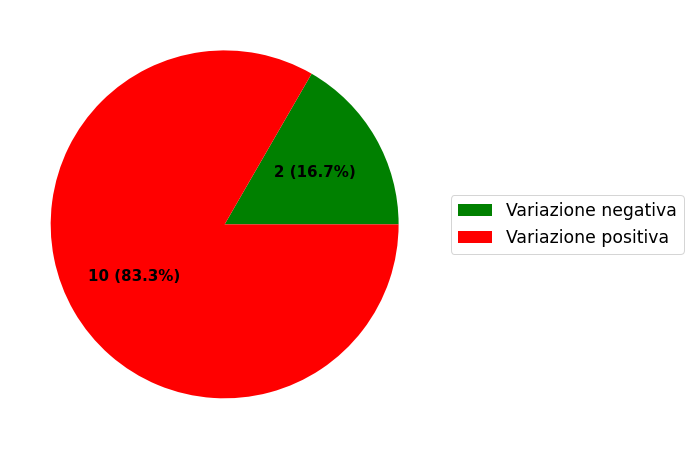

var mean -3.174603174603175 var rms 8.979133729352986


Info in <TCanvas::Print>: png file BMI0.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst0_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst0_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst0_gend0_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI1.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst1_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst1_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst1_gend0_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI2.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst2_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst2_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst2_gend0_vs_visite_profile.png has been created
Info in <TCan

In [75]:
for cluster in range(11):
    percentuali(tree, cluster, branch, vfl_first, vfl_last, uomo, colors, labels)

[]
424.0
424.0
12.382075471698114
10.96933962264151


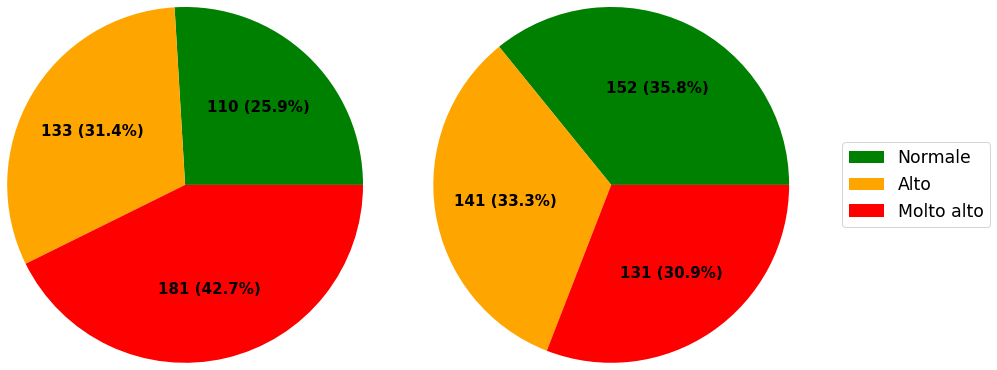

var neg 236.0 var pos 153.0
424.0


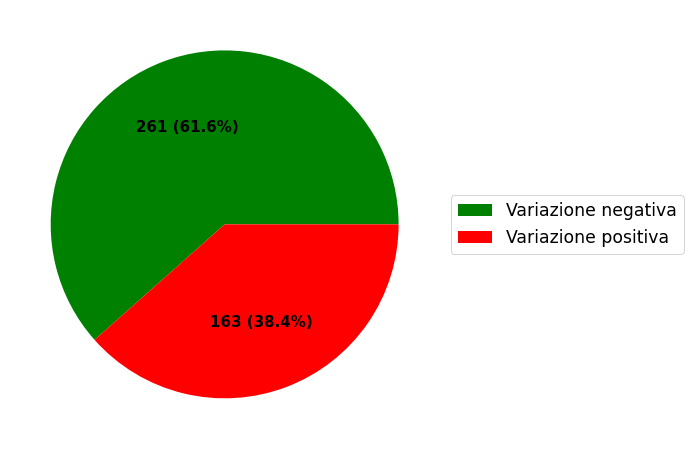

var mean -9.702929615442459 var rms 14.309309539657665


Info in <TCanvas::Print>: png file BMI-1.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst-1_gend0.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst-1_gend0_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst-1_gend0_vs_visite_profile.png has been created


In [77]:
percentuali(tree, -1, branch, vfl_first, vfl_last, uomo, colors, labels)

[]
1180.0
1180.0
13.75
12.533050847457627


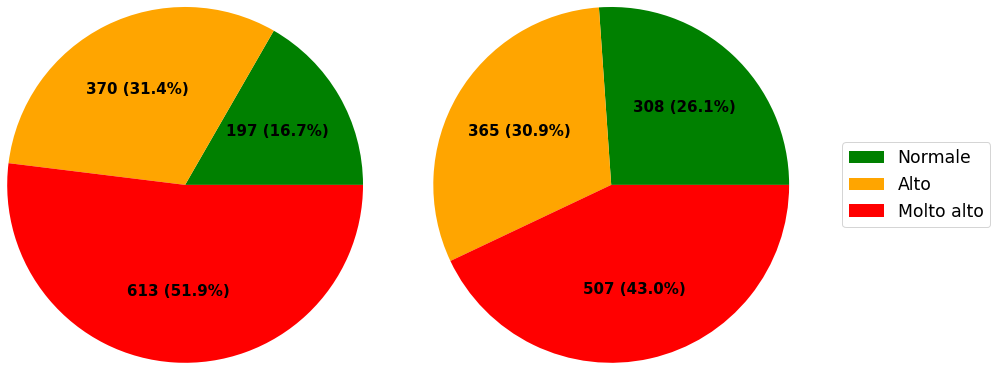

var neg 649.0 var pos 471.0
1180.0


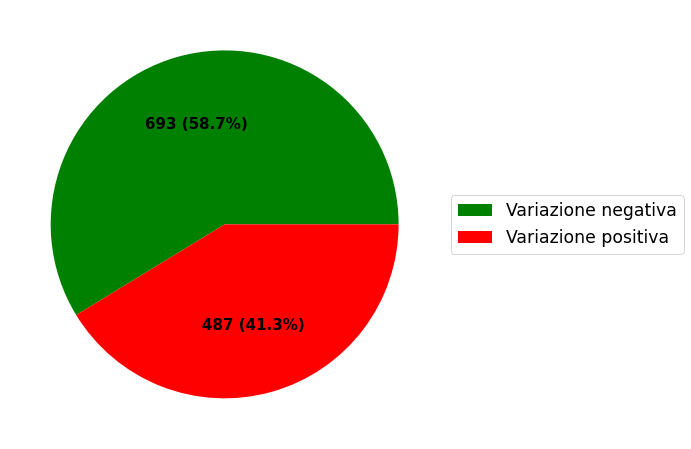

var mean -8.381083883298752 var rms 13.387425307144122
[]
0.0
0.0
0.0
0.0


/tmp/ipykernel_989/3728006616.py:49: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_f, autopct=lambda pct: func(pct, data_f), textprops=dict(color="black"), colors=colors, radius=1.5) #, frame=True
/tmp/ipykernel_989/3728006616.py:56: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_l, autopct=lambda pct: func(pct, data_l), textprops=dict(color="black"), colors=colors, radius=1.5) #, frame=True


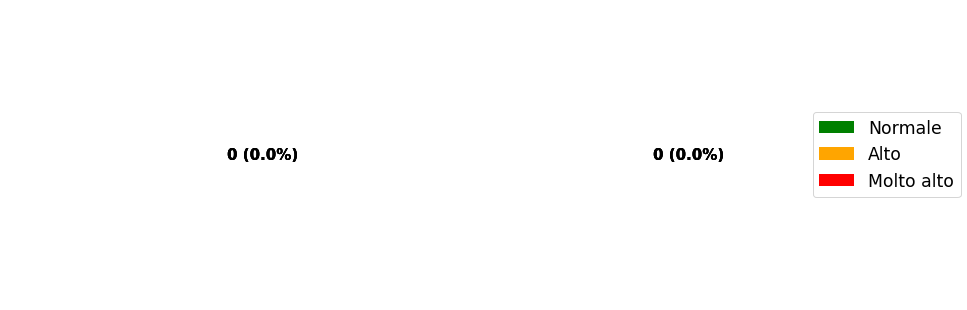

/tmp/ipykernel_989/3728006616.py:82: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = ax.pie(data_var, autopct=lambda pct: func(pct, data_var), textprops=dict(color="black"), colors=["green", "red"], radius=1) #, frame=True


var neg 0.0 var pos 0.0
0.0


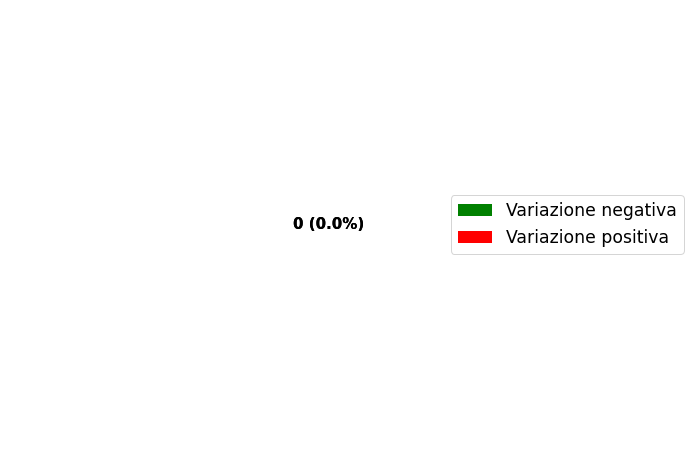

var mean 0.0 var rms 0.0
[]
121.0
121.0
19.925619834710744
19.115702479338843


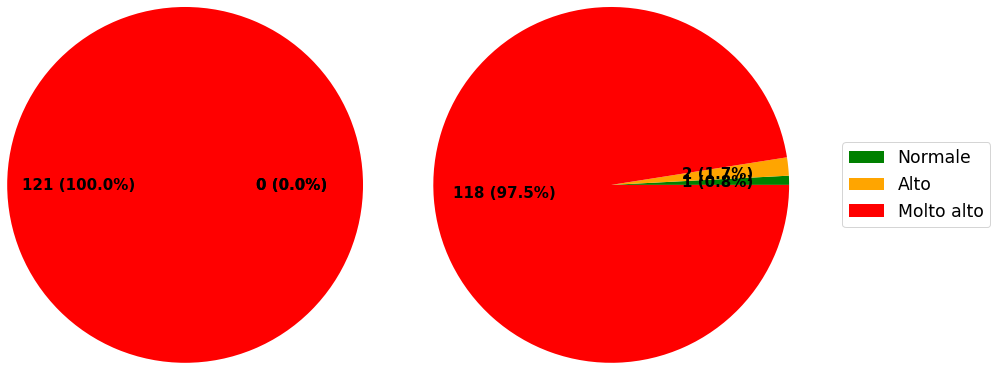

var neg 32.0 var pos 88.0
121.0


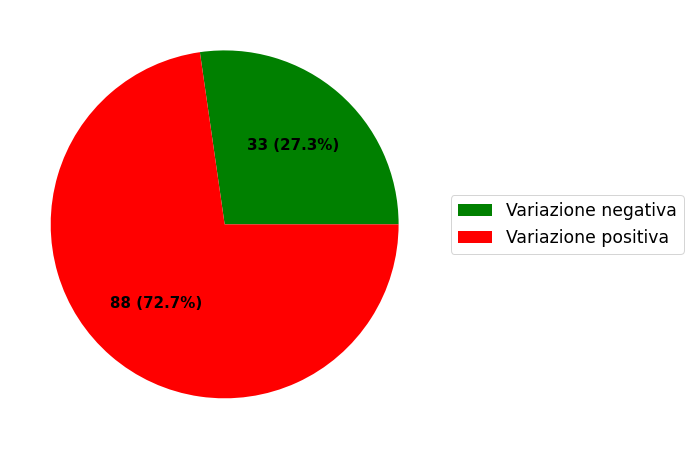

var mean -3.564205653021443 var rms 8.336861000502505
[]
222.0
222.0
16.684684684684683
14.842342342342342


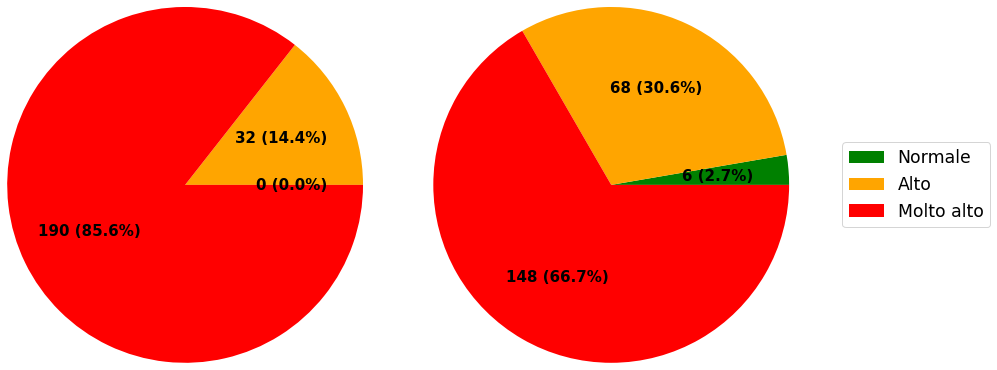

var neg 147.0 var pos 66.0
222.0


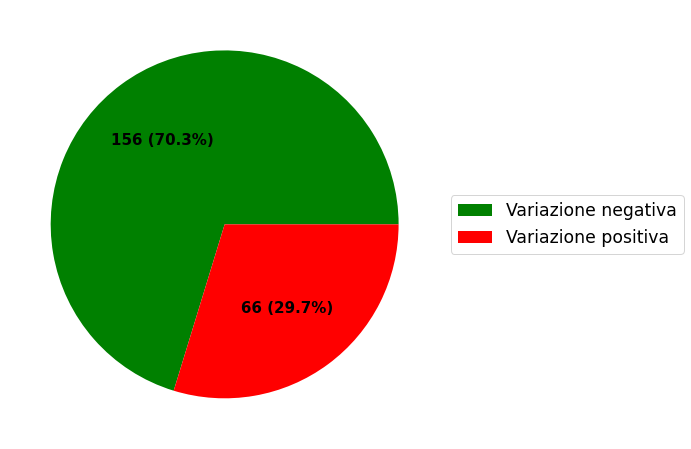

var mean -9.585204601774617 var rms 10.70155217987217
[]
10.0
10.0
20.0
20.0


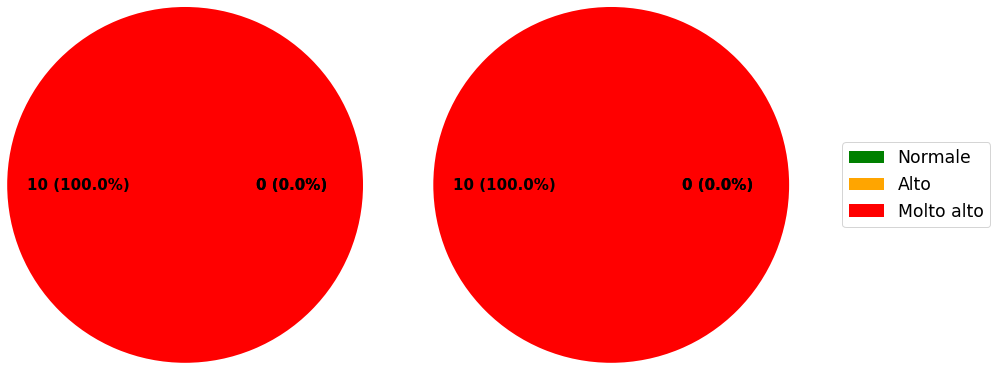

var neg 0.0 var pos 10.0
10.0


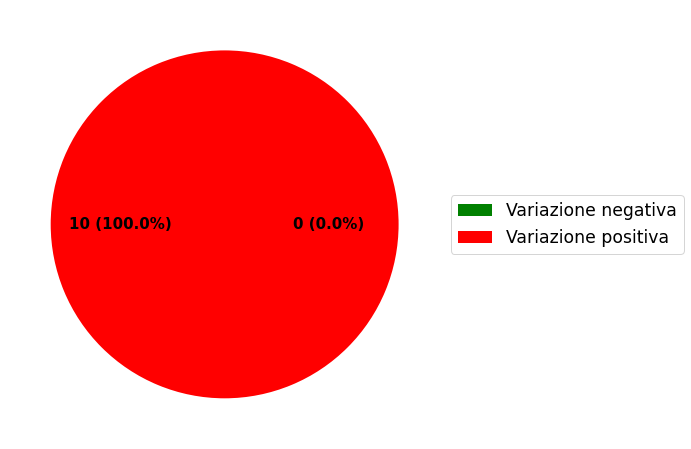

var mean 0.0 var rms 0.0
[]
62.0
62.0
13.951612903225806
12.741935483870968


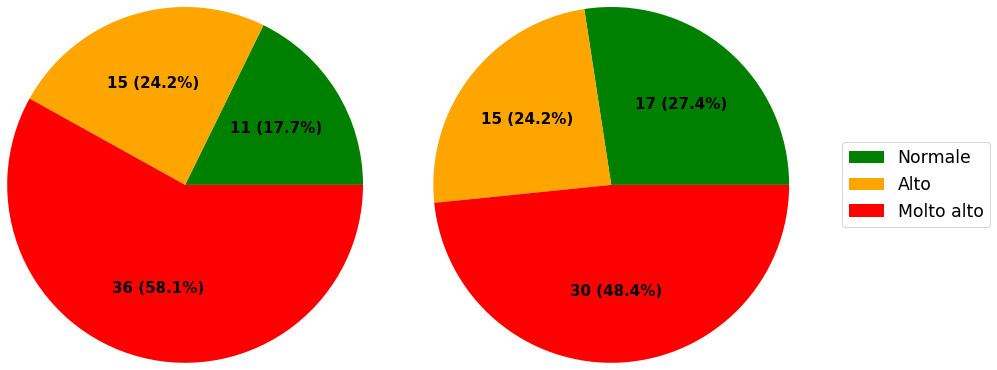

var neg 34.0 var pos 23.0
62.0


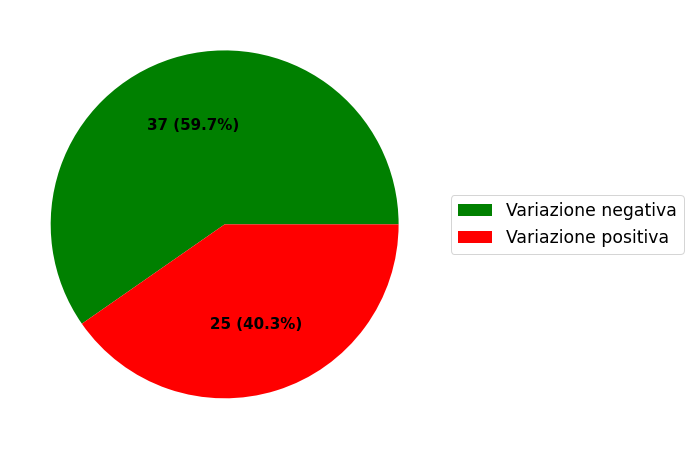

var mean -8.343524659517815 var rms 13.804273302657016
[]
96.0
96.0
18.5625
17.15625


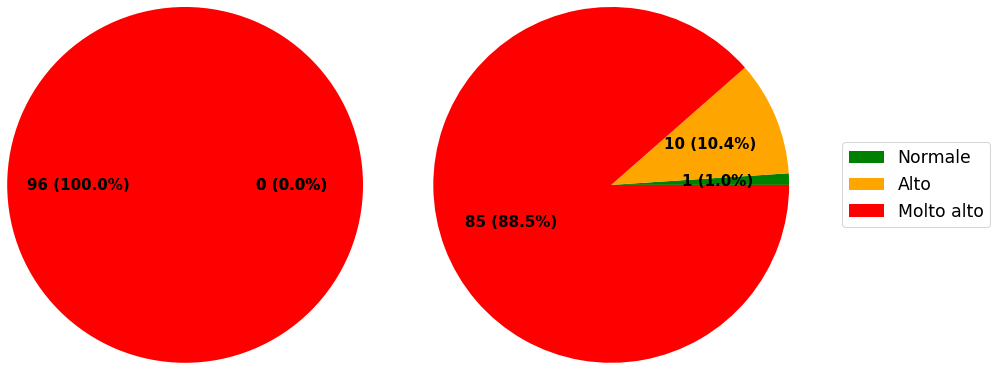

var neg 48.0 var pos 47.0
96.0


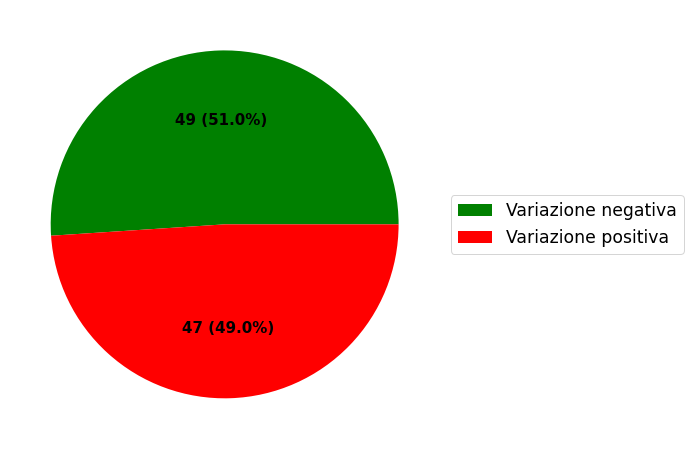

var mean -7.238157312786608 var rms 10.62534177989162
[]
662.0
662.0
10.765861027190333
9.682779456193353


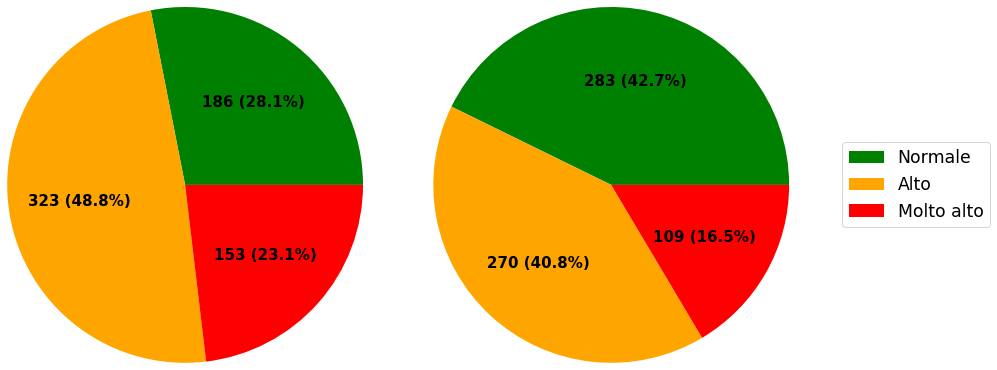

var neg 386.0 var pos 232.0
662.0


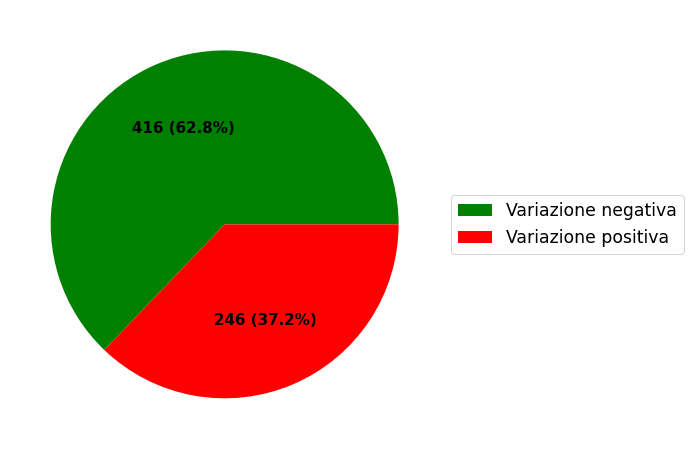

var mean -9.29693339878122 var rms 15.129528532240325
[]
1.0
1.0
20.0
20.0


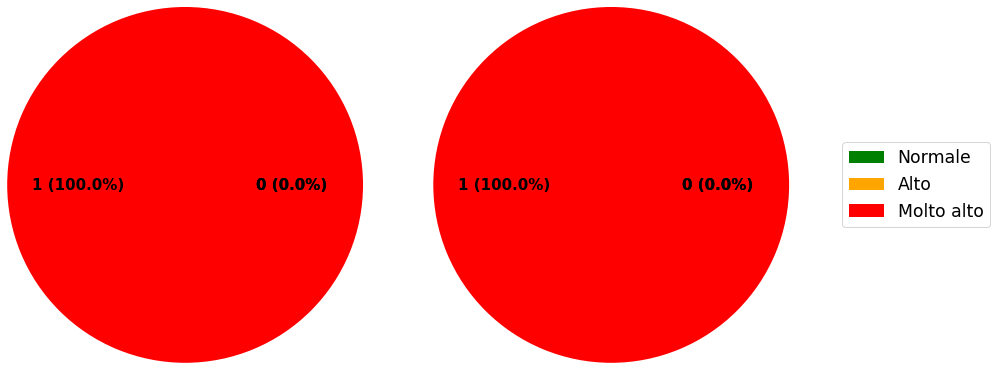

var neg 0.0 var pos 1.0
1.0


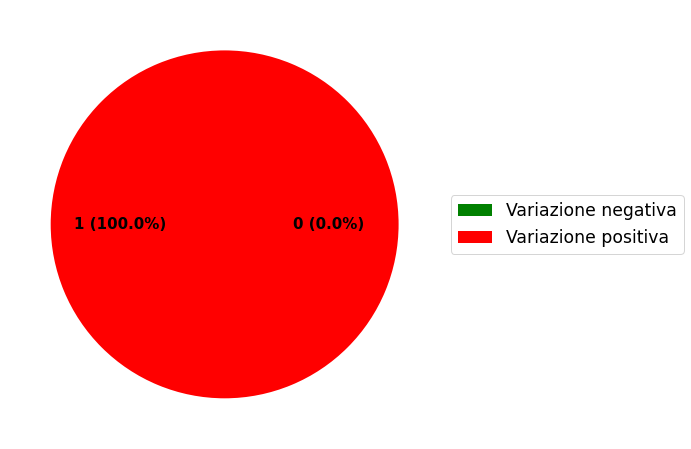

var mean 0.0 var rms 0.0
[]
6.0
6.0
19.333333333333332
19.0


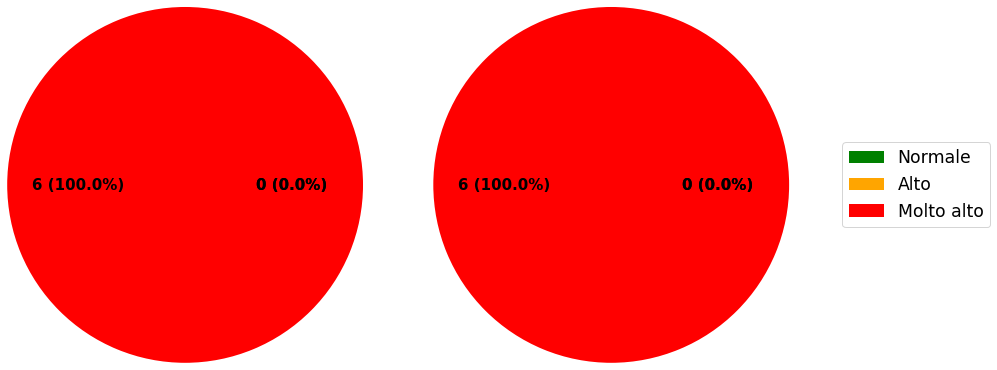

var neg 2.0 var pos 4.0
6.0


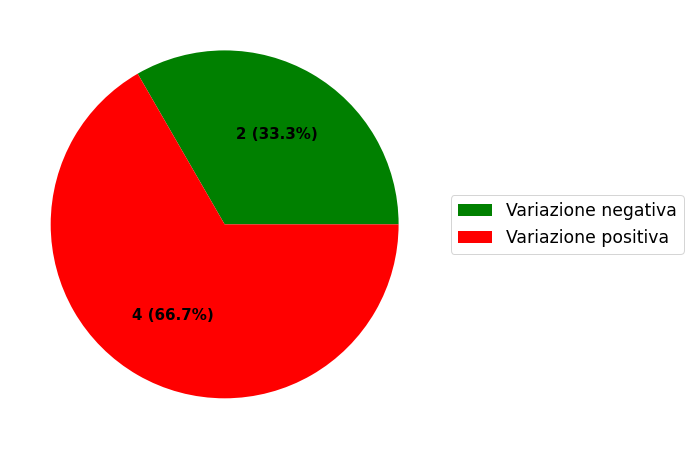

var mean -1.4583333333333333 var rms 5.021654497164146
[]
22.0
22.0
3.8636363636363638
4.0


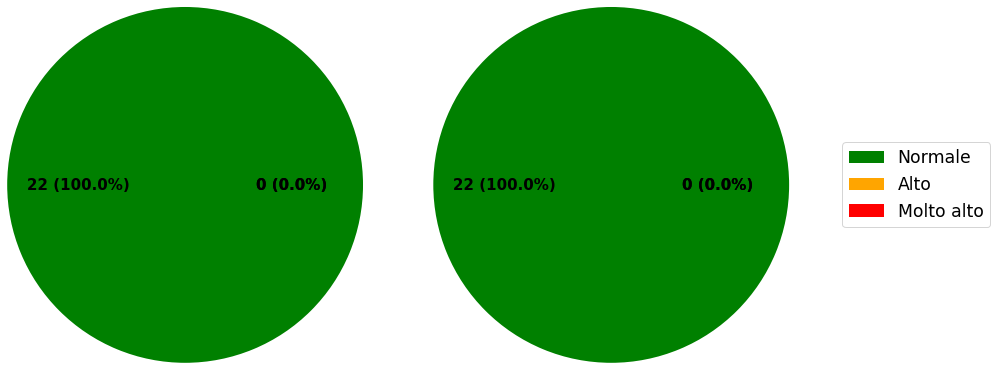

var neg 4.0 var pos 13.0
22.0


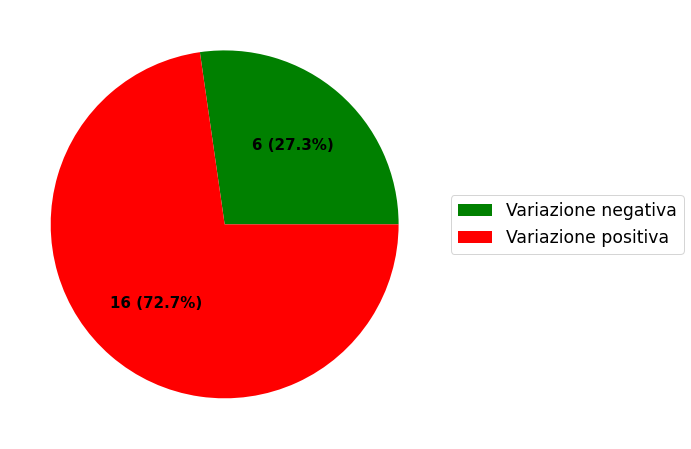

var mean 3.088235294117647 var rms 20.58333274962759


Info in <TCanvas::Print>: png file BMI0.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst0_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst0_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst0_gend1_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI1.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst1_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst1_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst1_gend1_vs_visite_profile.png has been created
Info in <TCanvas::Print>: png file BMI2.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst2_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst2_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst2_gend1_vs_visite_profile.png has been created
Info in <TCan

In [78]:
for cluster in range(11):
    percentuali(tree, cluster, branch, vfl_first, vfl_last, donna, colors, labels)

[]
1202.0
1202.0
13.569051580698835
12.376871880199667


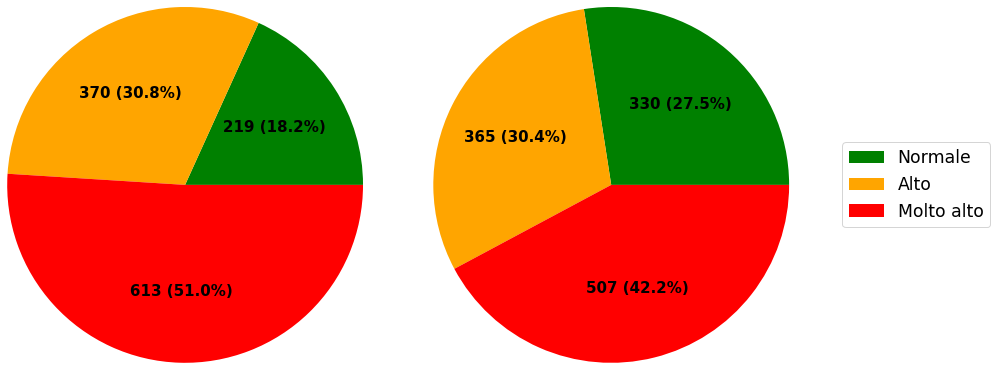

var neg 653.0 var pos 484.0
1202.0


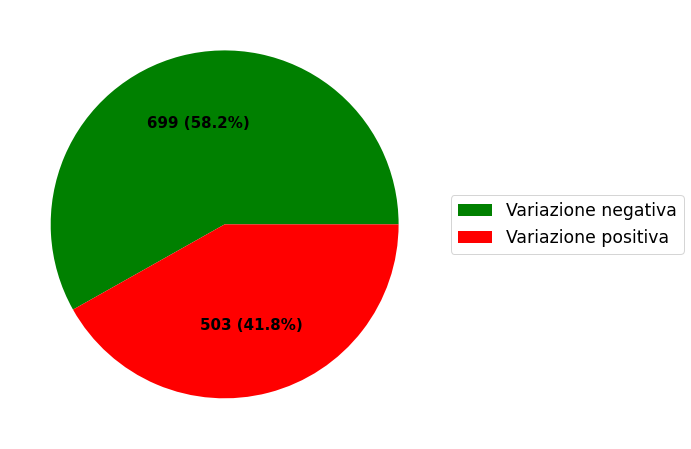

var mean -8.209598899995255 var rms 13.594686349616454


Info in <TCanvas::Print>: png file BMI-1.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst-1_gend1.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst-1_gend1_vs_visite.png has been created
Info in <TCanvas::Print>: png file pct_var_VFL_clst-1_gend1_vs_visite_profile.png has been created


In [79]:
percentuali(tree, -1, branch, vfl_first, vfl_last, donna, colors, labels)